<a href="https://colab.research.google.com/github/Selva-Subramanian/Zomato-restaurant-clustering-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANTS_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 4 - Zomato Restaurant Clustering and Sentiment Analysis**

## **(Unsupervised - Clustering)**

## <u>**Project by *Selva Subramanian S*** 

### **Data Science Trainee at AlmaBetter**

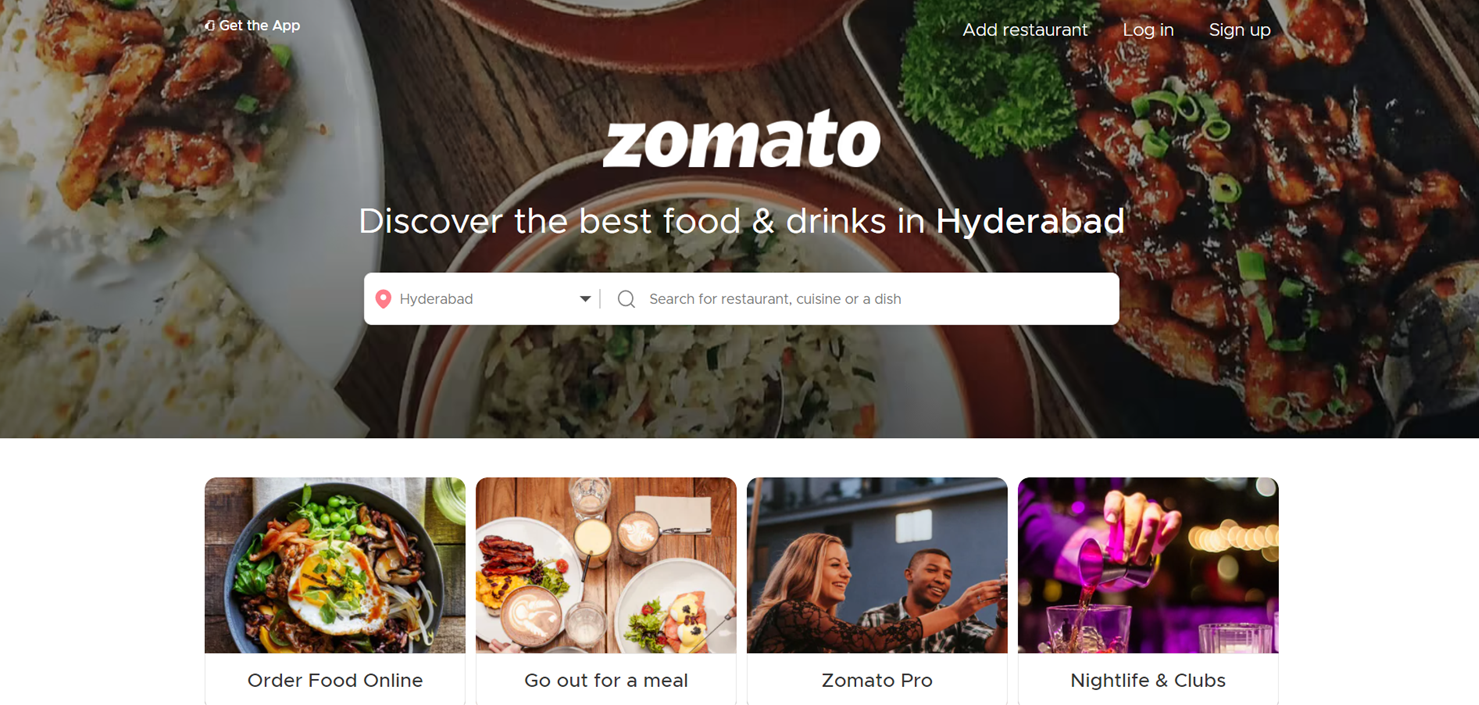

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [735]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b> Importing the required libraries

In [834]:
# for numerical computation
import numpy as np
from operator import add
import math
# for data manipulation 
import pandas as pd
# for creating copies
import copy

# for plotting visuals
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# for ease of view
from google.colab import data_table
data_table.enable_dataframe_formatter()

# data analysis
from wordcloud import WordCloud
from prettytable import PrettyTable
# scaling the dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# model building
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression

# evaluation metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import confusion_matrix, classification_report

# natural language processing
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [835]:
# load the dataset
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Notebooks/Capstone projects/Zomato Restaurants Clustering and Sentiment Analysis - Selva Subramanian S/'
df1 = pd.read_csv(working_dir_path + 'Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv(working_dir_path + 'Zomato Restaurant reviews.csv')

### <b> Data Inspection

In [836]:
# sample of the dataset
df1.head()

Name  ...                                            Timings
0                 Beyond Flavours  ...      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)
1                        Paradise  ...                                     11 AM to 11 PM
2                        Flechazo  ...              11:30 AM to 4:30 PM, 6:30 PM to 11 PM
3  Shah Ghouse Hotel & Restaurant  ...                                    12 Noon to 2 AM
4      Over The Moon Brew Company  ...  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

[5 rows x 6 columns]

In [837]:
# brief info of the dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [838]:
# brief description of the dataset
pd.set_option('display.max_rows', None)
df1.describe()

Name  ...         Timings
count               105  ...             104
unique              105  ...              77
top     Beyond Flavours  ...  11 AM to 11 PM
freq                  1  ...               6

[4 rows x 6 columns]

In [839]:
# columns in the datset
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

#### All restaurants have links and it is not much useful so let's just drop it. 


In [840]:
# Drop columns
df1 = df1.drop(['Links'], axis=1)

In [841]:
# replace null values with a string
df1 = df1.fillna('no info')
df1['Timings'][30] = 'no info'

In [842]:
# change datatype of 'Cost' feature
df1['Cost'] = df1['Cost'].apply(lambda x: int(x.replace(',','')))

In [843]:
# formatting the string in  Timings feature
word_list = [[['noon','Noon','PM','pm'],['p.m.']],[['midnight','Midnight','AM','am'],['a.m.']]]
for i in word_list:
  j = i[1][0]
  for k in i[0]:
    df1['Timings'] = df1['Timings'].str.replace(k,j)

### <b> Exploratory Data Analysis

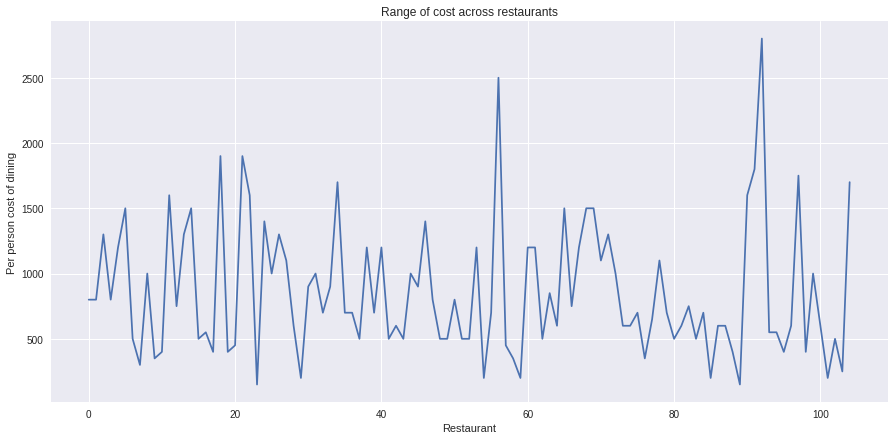

min: 150.0
IQR1: 500.0
avg: 700.0
IQR3: 1200.0
max: 2800.0


In [844]:
# Analysis of the feature 'Cost'
plt.figure(figsize=(15,7))
df1['Cost'].plot(kind='line')
plt.title("Range of cost across restaurants")
plt.xlabel("Restaurant")
plt.ylabel("Per person cost of dining")
plt.show()
print(f"min: {df1['Cost'].describe()[3]}\nIQR1: {df1['Cost'].describe()[4]}\navg: {df1['Cost'].describe()[5]}\nIQR3: {df1['Cost'].describe()[6]}\nmax: {df1['Cost'].describe()[7]}")

#### Most of the restaurants cost of dining per person lies in the range of 500 and 1200 with minimum cost of dining per person at 150 and maximum at 2800 and average cost at 700.

##### <b> Unique values in our features





In [845]:
# initialize empty lists
Unique_Collections = []
Unique_Cuisines = []

# features list
unique_list = [Unique_Collections, Unique_Cuisines]

# logic to extract unique values in the features
summation = 0
for i in df1.columns[2:-1]:
  l = unique_list[summation]
  summation += 1
  for j in range(len(df1[i])):
    for k in list(df1[i])[j].split(','):
      if k not in l and k[1:] not in l:
        if k[0]==' ':
          l.append(k[1:])
        else:
          l.append(k)

# number of unique items in the features
print(f"Total unique values in the feature 'Cost' is {len(df1['Cost'].value_counts())}\n")
for n,m in enumerate(df1.columns[2:-1]):
  print(f"Total unique values in the feature '{m}' is {len(unique_list[n])}\n")

Total unique values in the feature 'Cost' is 29

Total unique values in the feature 'Collections' is 38

Total unique values in the feature 'Cuisines' is 44



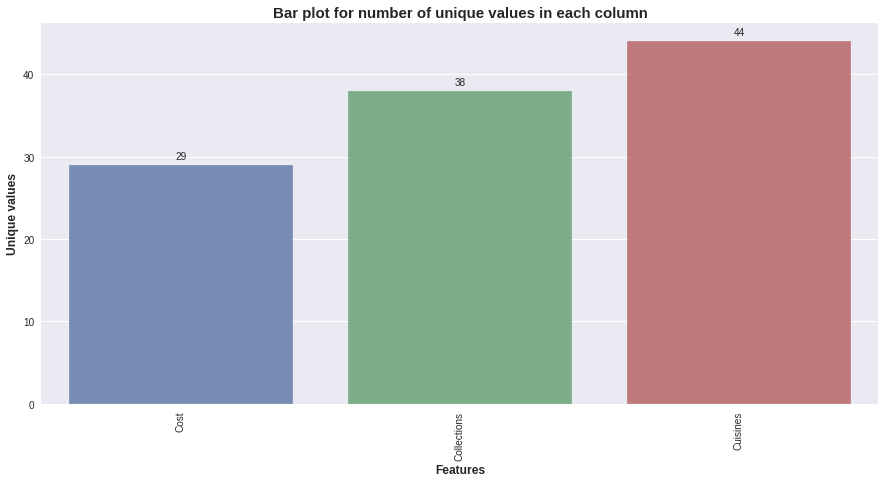

In [846]:
# count the unique values of the features
feature_names = ['Cost', 'Collections', 'Cuisines']
cost = len(df1['Cost'].value_counts())
collections = len(unique_list[0])
cuisines = len(unique_list[1])
feature_count = [cost, collections, cuisines]
f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=feature_names, y=feature_count, alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [847]:
import numpy as np
a = np.array([1,2,3,4])
np.reshape(a,(2,2))

array([[1, 2],
       [3, 4]])

In [848]:
# count of unique items in the features
features = ['Collections', 'Cuisines']

# initialize empty dictionaries
unique_count = {}
m = {}

# update unique values of 'Cost' and its frequency of occurence
for l in df1['Cost'].unique():
  m[l] = list(df1['Cost'].values).count(l)
unique_count['Cost'] = m
summation = 0

# initialize empty lists
collections_feature_list = []
cuisines_feature_list = []

# update unique values of 'Collections' and 'Cuisines' 
for i in unique_list:
  if i == unique_list[0]:
    df1[features[summation]] = df1[features[summation]].apply(lambda x: x.split(','))
    df1[features[summation]].apply(lambda x: collections_feature_list.extend(x))
    collections_feature_list = [x[1:] if x[0]==' ' else x[:] for x in collections_feature_list]
  else:
    df1[features[summation]] = df1[features[summation]].apply(lambda x: x.split(','))
    df1[features[summation]].apply(lambda x: cuisines_feature_list.extend(x))
    cuisines_feature_list = [x[1:] if x[0]==' ' else x[:] for x in cuisines_feature_list]
  
  # empty dict for 'Collections' and 'Cuisines'
  k = {}
  # update frequency of occurence
  for j in i:
    if i == unique_list[0]:
      k[j] = collections_feature_list.count(j)
    else:
      k[j] = cuisines_feature_list.count(j)  
  unique_count[features[summation]] = k
  feature_list = []
  summation += 1  

#### *Top 25 most frequent values of the features*

In [849]:
# create a table for a better visual
table = PrettyTable(['SL', 'Cost', 'Collections', 'Cuisines'])
for i in range(1,26):
  table.add_row([i, sorted(unique_count['Cost'].items(), key=lambda x: x[1],reverse = True)[i], sorted(unique_count['Collections'].items(), key=lambda x: x[1], reverse = True)[i], sorted(unique_count['Cuisines'].items(), key=lambda x: x[1], reverse = True)[i]])
table

+----+-----------+----------------------------------------------------+----------------------+
| SL |    Cost   |                    Collections                     |       Cuisines       |
+----+-----------+----------------------------------------------------+----------------------+
| 1  | (600, 10) |               ('Great Buffets', 11)                |   ('Chinese', 43)    |
| 2  |  (700, 8) | ('Food Hygiene Rated Restaurants in Hyderabad', 8) | ('Continental', 21)  |
| 3  | (1200, 7) |           ('Live Sports Screenings', 7)            |   ('Biryani', 16)    |
| 4  | (1000, 6) |             ("Hyderabad's Hottest", 7)             |    ('Asian', 15)     |
| 5  |  (400, 6) |             ('Corporate Favorites', 6)             |  ('Fast Food', 15)   |
| 6  |  (800, 5) |                  ('Top-Rated', 5)                  |   ('Italian', 14)    |
| 7  | (1500, 5) |                ('Gold Curated', 5)                 |   ('Desserts', 13)   |
| 8  |  (200, 5) |             ('Trending This Week', 5)              | ('South Indian', 9)  |
| 9  | (1300, 4) |              ('Best Bars & Pubs', 4)               |    ('Bakery', 7)     |
| 10 |  (350, 3) |               ('Sunday Brunches', 4)               |     ('Kebab', 6)     |
| 11 | (1600, 3) |               ('Veggie Friendly', 4)               |   ('American', 6)    |
| 12 |  (750, 3) |              ('Barbecue & Grill', 3)               |    ('Mughlai', 6)    |
| 13 |  (550, 3) |                 ('Happy Hours', 3)                 |    ('Andhra', 6)     |
| 14 | (1100, 3) |               ('Gigs and Events', 3)               |     ('Cafe', 6)      |
| 15 |  (900, 3) |           ('Late Night Restaurants', 2)            | ('Mediterranean', 5) |
| 16 | (1900, 2) |                  ('Rooftops', 2)                   |   ('Beverages', 5)   |
| 17 |  (450, 2) |                ('Fancy and Fun', 2)                |    ('Burger', 5)     |
| 18 |  (150, 2) |              ('Great Breakfasts', 2)               |     ('Salad', 5)     |
| 19 | (1400, 2) |               ('Function Venues', 2)               |   ('European', 4)    |
| 20 | (1700, 2) |            ('Pan-Asian Delicacies', 2)             |    ('Seafood', 4)    |
| 21 |  (300, 1) |            ('Sneak Peek Hyderabad', 2)             |     ('Sushi', 4)     |
| 22 | (2500, 1) |                 ('New on Gold', 2)                 |  ('Hyderabadi', 4)   |
| 23 |  (850, 1) |               ('Frozen Delights', 1)               |     ('Momos', 4)     |
| 24 |  (650, 1) |                 ('Street Food', 1)                 |     ('Thai', 3)      |
| 25 | (1800, 1) |               ('Pocket Friendly', 1)               |   ('Ice Cream', 2)   |
+----+-----------+----------------------------------------------------+----------------------+

In [850]:
# text for word cloud generation
features = ['Collections', 'Cuisines']

# text corpus of 'Collections' and 'Cuisines'
for i in features:
  if i == 'Collections': 
    collections_feature_list_wo_no_info = []
    for j in collections_feature_list:
      if j != 'no info':
        collections_feature_list_wo_no_info.append(j)
  else:
     for n, m in enumerate(cuisines_feature_list):
      if m in ['North Indian', 'South Indian', 'Street Food']:
        if m == 'North Indian':
          cuisines_feature_list[n] = 'NorthIndian'
        elif m == 'South Indian':
          cuisines_feature_list[n] = 'SouthIndian'
        else:
          cuisines_feature_list[n] = 'StreetFood'

collections_text = ','.join(collections_feature_list_wo_no_info)
cuisines_text = ','.join(cuisines_feature_list)
    
# text corpus of 'Cost'
cost_text = df1['Cost'].value_counts()
cost_text.index = cost_text.index.map(str)

#### *Word cloud for the feature* ***'Cost'***

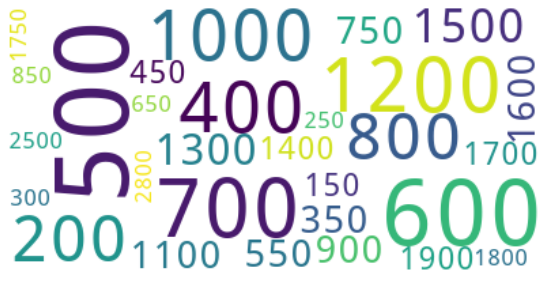

In [851]:
# Creating word_cloud with text as argument in .generate_from_frequencies() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(cost_text)

# Display the generated Word Cloud
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### *Word cloud for the feature* ***'Collections'*** 

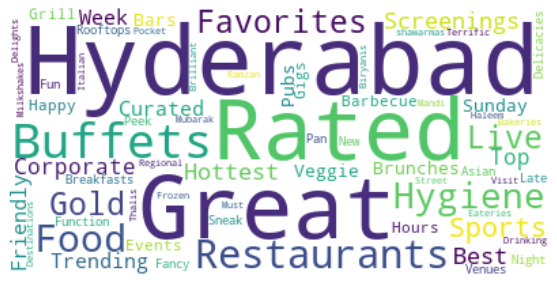

In [852]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(collections_text)

# Display the generated Word Cloud
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### *Word cloud for the feature* ***'Cuisines'***

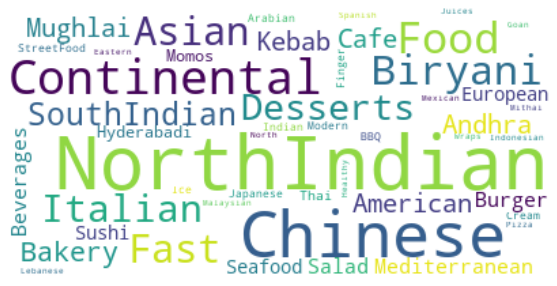

In [853]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(cuisines_text)

# Display the generated Word Cloud
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### <b> Feature Engineering

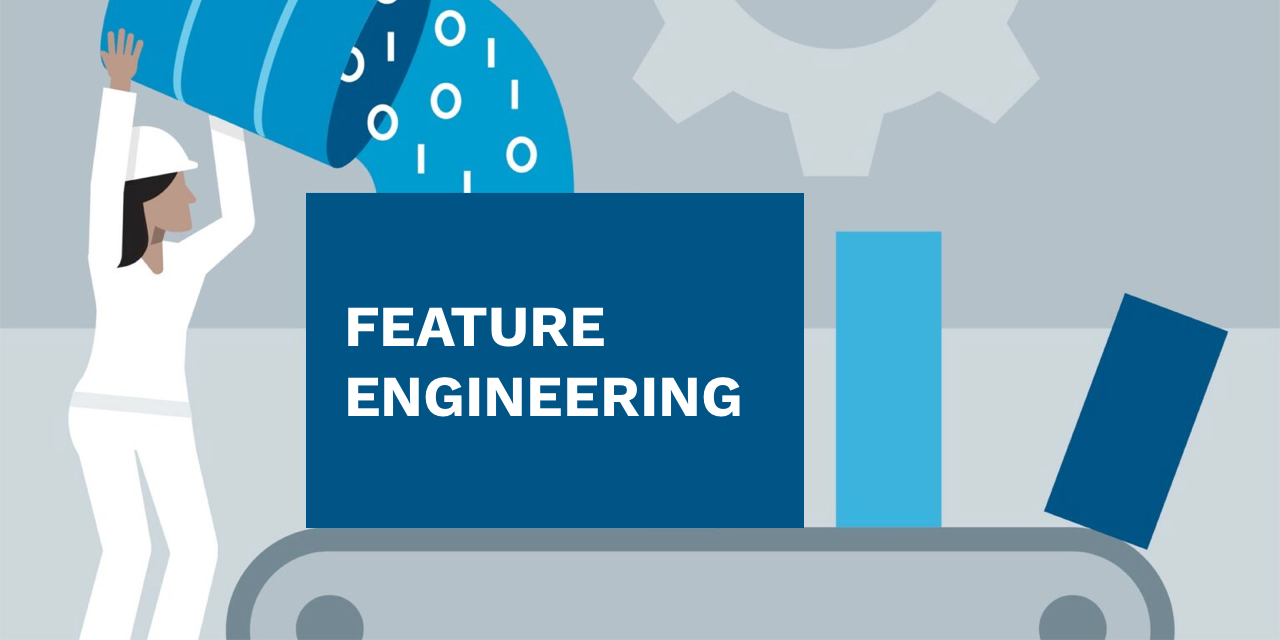

#### Clustering is based on similarity which is measured using distance, so it is necessary to have numerical (continuous) columns so as to quantify distance and compute similarity. Let's engineer such features.

#### Defining the function to quantify similarity.




In [854]:
def similarity_scores(df, df_col, col_name):
  '''
  A function to quantify similarities in textual data
  Function takes three arguments
  the dataset, column to calculate similarity, new column name
  '''
  df['df_col_copy'] = copy.deepcopy(df_col)
  df['original index'] = range(105)

  # function to strip off unnecessary spaces
  def remove_spaces(x):
    l = []
    for i in x:
      l.append(i.strip())
    return l
  
  # apply remove_space function
  df['df_col_copy'] = df['df_col_copy'].apply(lambda row: remove_spaces(row))

  # get max length of the column
  empty_len_list = []
  for c in df_col:
    empty_len_list.append(len(c))
  max_count = max(empty_len_list)
  
  # function to compare similarity between one row and all rows
  def similarity(y,z):
    m = []
    for j in y:
      count = max_count
      for k in j:
        if k in y[z]:
          count += 1
        if k not in y[z]:
          count -= 1
      m.append(count)
    return m

  # apply similarity function for all rows
  df[col_name] = [0]*len(df)
  for num in range(105):
    df['score'] = similarity(df['df_col_copy'], num)
  
    # reorder as per similarity scores for each row
    df = df.sort_values(by = 'score', ascending=False)

    # get similarity scores
    df[col_name] = df[col_name] + [x*10 for x in list(range(len(df)))]

  # function for min_max_scaling
  def minimum_maximum_scaler(x, min, max):
    x_scaled = (x-min)/(max-min)
    return round(x_scaled,2)
  
  # scale similarity score
  df[col_name] = df[col_name].apply(lambda x: minimum_maximum_scaler(x, df[col_name].min(), df[col_name].max()))
  
  # sort dataframe and remove redundant columns
  df = df.sort_values(by = 'original index')
  df = df.drop(['df_col_copy', 'score', 'original index'], axis=1)

  return df

#### Format Timings Feature

In [855]:
# clean the feature 'Timings'
to_process = []
for l,i in enumerate(df1['Timings']):
  ap = []
  c = 0
  for k,j in enumerate(i):
    if j in ['a', 'p'] and j not in ap:
      c = 1
      ap.append(j)
    elif j == '.' and c == 1:
      if i[k-2] != ' ':
        if l not in to_process:
          to_process.append(l)
    else:
      c += 1
  ap = []
for m in to_process:
  df1['Timings'][m] = df1['Timings'][m].replace('a', ' '+'a')
  df1['Timings'][m] = df1['Timings'][m].replace('p', ' '+'p')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [856]:
# function to extract time
def without_days(d):
  time = ''
  append = 1
  for i in d:
    if i == '(':
      append = 0
    if append == 1:
      time += i
    if i == ')':
      append = 1
  return time

In [857]:
# create new encoded feature of 'Timings 
df1['timings'] = copy.deepcopy(df1['Timings'].values)
df1['timings'] = df1['Timings'].apply(lambda x: without_days(x))
df1['timings'] = df1['timings'].apply(lambda x: x.split(','))

In [858]:
# remove unwanted spaces in the feature values
for i in range(len(df1['timings'])):
  for j in range(len(df1['timings'][i])):
    df1['timings'][i][j] = df1['timings'][i][j].strip()

In [859]:
# treat special cases with a different approach
l = [20,26,72,95]
for i in l:
  df1['timings'][i] = df1['timings'][i][:-1]
df1['timings'][30] = ['1 a.m. to 12 p.m.']
df1['timings'][53] = df1['timings'][53][0:2]
df1['timings'][91] = ['1 a.m. to 12 p.m.']
df1['timings'][92] = ['1 a.m. to 12 p.m.']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

#### Quantify Similarities

In [860]:
# apply similarity_scores function to get scores of the features
df1 = similarity_scores(df1, df1['Cuisines'], 'cuisines similarity')
df1 = similarity_scores(df1, df1['Collections'], 'collections similarity')
df1['collections similarity'][df1['collections similarity'] < 0.2] = 0
df1 = similarity_scores(df1, df1['timings'], 'timings similarity')
df1 = df1.drop('timings', axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [861]:
# overview of refined dataset
data_table.disable_dataframe_formatter()
df1.head()

Name  ...  timings similarity
0                 Beyond Flavours  ...                0.67
1                        Paradise  ...                0.14
2                        Flechazo  ...                0.77
3  Shah Ghouse Hotel & Restaurant  ...                0.21
4      Over The Moon Brew Company  ...                0.56

[5 rows x 8 columns]

# <u> Clustering Implementation

### <b> K-means Clustering

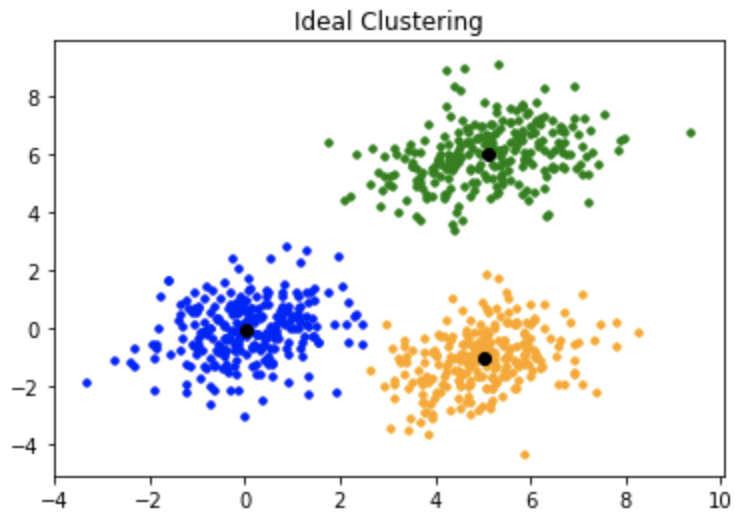

In [862]:
# Silhouette score
scaler = MinMaxScaler()
df1['Cost'] = scaler.fit_transform(df1['Cost'].values.reshape(-1,1))
features = ['Cost']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6512067586634858
For n_clusters = 3, silhouette score is 0.5903958298192412
For n_clusters = 4, silhouette score is 0.5913183347879867
For n_clusters = 5, silhouette score is 0.5585977627456998
For n_clusters = 6, silhouette score is 0.5891612594437146
For n_clusters = 7, silhouette score is 0.5709913338823862
For n_clusters = 8, silhouette score is 0.6007191232758355
For n_clusters = 9, silhouette score is 0.6290756980228267
For n_clusters = 10, silhouette score is 0.6701507908692181
For n_clusters = 11, silhouette score is 0.6784169771327081
For n_clusters = 12, silhouette score is 0.6996628041490639
For n_clusters = 13, silhouette score is 0.6751826394059136
For n_clusters = 14, silhouette score is 0.6914534987405323
For n_clusters = 15, silhouette score is 0.7178294583817979


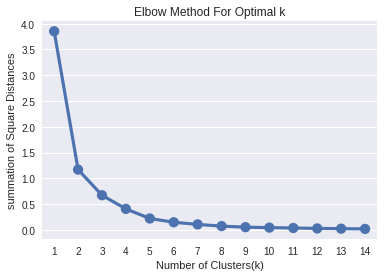

In [863]:
# elbow method for optimal k
summation_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    summation_of_sq_dist[k] = km.inertia_
    
#  plot the graph for the summation of square distance values and number of clusters
sns.pointplot(x = list(summation_of_sq_dist.keys()), y = list(summation_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('summation of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [864]:
# cluster the restaurants
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1], dtype=int32)

In [865]:
# cluster details
print(f'{list(y_kmeans).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_kmeans).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_kmeans).count(2)} restaurants belongs to the 3rd cluster')

63 restaurants belongs to the 1st cluster
16 restaurants belongs to the 2nd cluster
26 restaurants belongs to the 3rd cluster


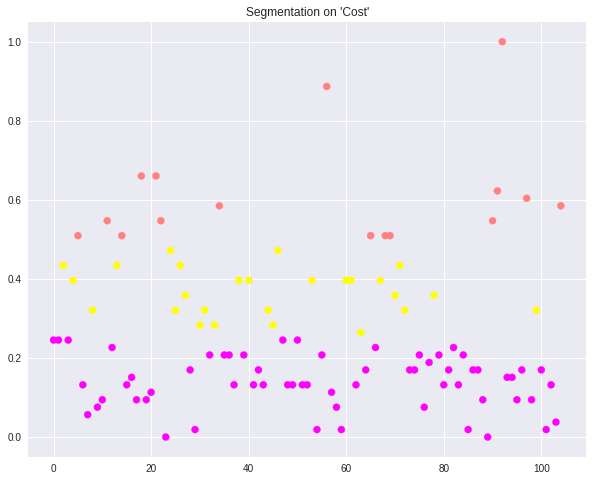

In [866]:
# visualize the clusters
plt.figure(figsize=(10,8))
plt.title("Segmentation on 'Cost'")
plt.scatter(range(105), df1['Cost'], c=y_kmeans, s=50, cmap='spring')

In [867]:
# Silhouette score
features = ['collections similarity']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7932621562002694
For n_clusters = 3, silhouette score is 0.9015060797805833
For n_clusters = 4, silhouette score is 0.8799866919802306
For n_clusters = 5, silhouette score is 0.8698871256007714
For n_clusters = 6, silhouette score is 0.8710359312283804
For n_clusters = 7, silhouette score is 0.8089964924889921
For n_clusters = 8, silhouette score is 0.8146556034502705
For n_clusters = 9, silhouette score is 0.8314789423699833
For n_clusters = 10, silhouette score is 0.8306980714627179
For n_clusters = 11, silhouette score is 0.8264122091385078
For n_clusters = 12, silhouette score is 0.8186357280276045
For n_clusters = 13, silhouette score is 0.8197059979422523
For n_clusters = 14, silhouette score is 0.8279022316928281
For n_clusters = 15, silhouette score is 0.8338644421317137


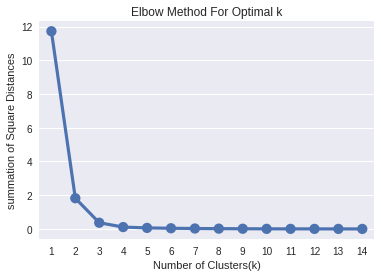

In [868]:
# elbow method for optimal k
summation_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    summation_of_sq_dist[k] = km.inertia_
    
#  plot the graph for the summation of square distance values and number of clusters
sns.pointplot(x = list(summation_of_sq_dist.keys()), y = list(summation_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('summation of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [869]:
# cluster the restaurants
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([1, 0, 3, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 3,
       0, 2, 3, 2, 1, 3, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1,
       3, 2, 3, 0, 2, 3, 2, 2, 2, 3, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1,
       2, 0, 3, 3, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

In [870]:
# cluster details
print(f'{list(y_kmeans).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_kmeans).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_kmeans).count(2)} restaurants belongs to the 3rd cluster')
print(f'{list(y_kmeans).count(3)} restaurants belongs to the 4th cluster')

26 restaurants belongs to the 1st cluster
15 restaurants belongs to the 2nd cluster
54 restaurants belongs to the 3rd cluster
10 restaurants belongs to the 4th cluster


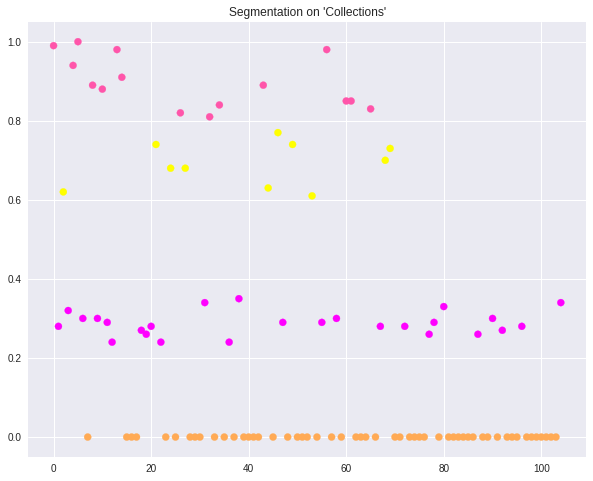

In [871]:
# visualize the clusters
plt.figure(figsize=(10,8))
plt.title("Segmentation on 'Collections'")
plt.scatter(range(105), df1['collections similarity'], c=y_kmeans, s=50, cmap='spring')

In [872]:
# Silhouette score
features = ['cuisines similarity']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6336672623154778
For n_clusters = 3, silhouette score is 0.6338526595798217
For n_clusters = 4, silhouette score is 0.6431815992359905
For n_clusters = 5, silhouette score is 0.6336401724613683
For n_clusters = 6, silhouette score is 0.626398097745098
For n_clusters = 7, silhouette score is 0.5983420813686275
For n_clusters = 8, silhouette score is 0.5849910628908115
For n_clusters = 9, silhouette score is 0.5832790581113697
For n_clusters = 10, silhouette score is 0.5733355881312673
For n_clusters = 11, silhouette score is 0.5589169220347019
For n_clusters = 12, silhouette score is 0.5995980219625138
For n_clusters = 13, silhouette score is 0.5734354940355991
For n_clusters = 14, silhouette score is 0.6105691669018553
For n_clusters = 15, silhouette score is 0.6133392784589745


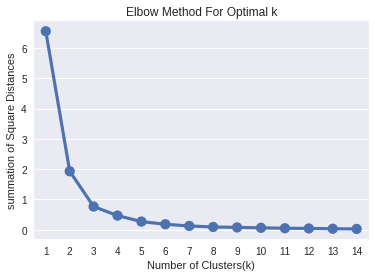

In [873]:
# elbow method for optimal k
summation_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    summation_of_sq_dist[k] = km.inertia_
    
#  plot the graph for the summation of square distance values and number of clusters
sns.pointplot(x = list(summation_of_sq_dist.keys()), y = list(summation_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('summation of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [874]:
# cluster the restaurants
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1], dtype=int32)

In [875]:
# cluster details
print(f'{list(y_kmeans).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_kmeans).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_kmeans).count(2)} restaurants belongs to the 3rd cluster')

44 restaurants belongs to the 1st cluster
25 restaurants belongs to the 2nd cluster
36 restaurants belongs to the 3rd cluster


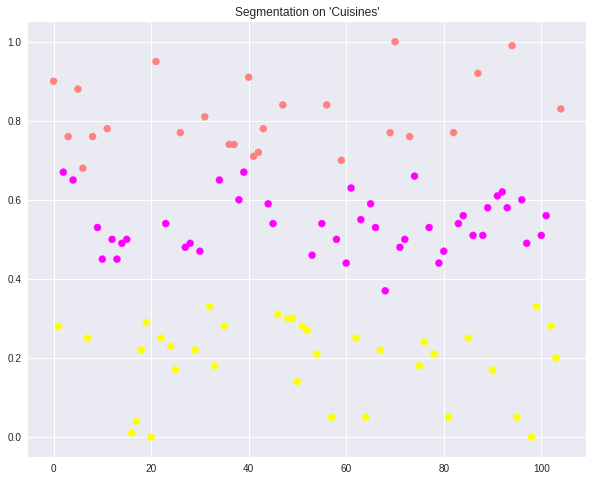

In [876]:
# visualize the clusters
plt.figure(figsize=(10,8))
plt.title("Segmentation on 'Cuisines'")
plt.scatter(range(105), df1['cuisines similarity'], c=y_kmeans, s=50, cmap='spring')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


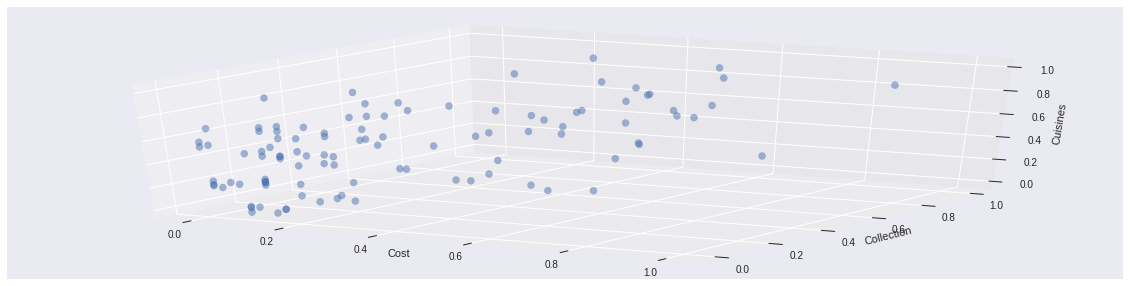

In [877]:
# 3D visualization 
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,5))
plt.title('3d visualization of Cost, Collections and Cuisines')
ax=fig.add_subplot(111,projection='3d')
xs=df1['Cost']
ys=df1['collections similarity']
zs=df1['cuisines similarity']
ax.scatter(xs,ys,zs,s=50,alpha=0.5)
ax.set_xlabel('Cost')
ax.set_ylabel('Collection')
ax.set_zlabel('Cuisines')
plt.show()

#### <b> Cost vs. Benefit Analysis

In [878]:
# create appropriate features
df1['Cuisines Count'] = df1['Cuisines'].apply(lambda x: len(x))
df1['Collections Count'] = df1['Collections'].apply(lambda x: len(x))

In [879]:
# scale the features
scaler = MinMaxScaler()
df1['Cuisines Count'] = scaler.fit_transform(df1['Cuisines Count'].values.reshape(-1,1))
df1['Collections Count'] = scaler.fit_transform(df1['Collections Count'].values.reshape(-1,1))

In [880]:
# Silhouette score
features = ['Cuisines Count']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6487891434335625
For n_clusters = 3, silhouette score is 0.7513981513981515
For n_clusters = 4, silhouette score is 0.8652509652509652
For n_clusters = 5, silhouette score is 0.9857142857142858
For n_clusters = 6, silhouette score is 0.9904761904761905


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


For n_clusters = 7, silhouette score is 0.9904761904761905


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


For n_clusters = 8, silhouette score is 0.9904761904761905
For n_clusters = 9, silhouette score is 0.9904761904761905


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


For n_clusters = 10, silhouette score is 0.9904761904761905
For n_clusters = 11, silhouette score is 0.9904761904761905
For n_clusters = 12, silhouette score is 0.9904761904761905
For n_clusters = 13, silhouette score is 0.9904761904761905
For n_clusters = 14, silhouette score is 0.9904761904761905
For n_clusters = 15, silhouette score is 0.9904761904761905


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  """
/usr/local/lib/pyt

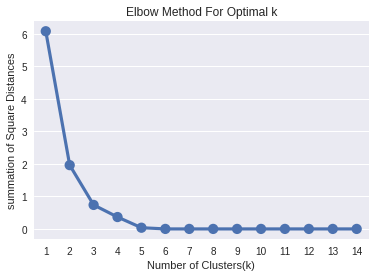

In [881]:
# elbow method for optimal k
summation_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    summation_of_sq_dist[k] = km.inertia_

# plot the graph for the summation of square distance values and number of clusters
sns.pointplot(x = list(summation_of_sq_dist.keys()), y = list(summation_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('summation of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [882]:
# cluster the restaurants
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([0, 1, 3, 0, 0, 0, 3, 4, 0, 2, 1, 3, 1, 1, 1, 2, 4, 2, 1, 1, 4, 0,
       4, 2, 1, 4, 0, 1, 2, 4, 1, 0, 1, 2, 3, 1, 0, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 4, 2, 3, 2, 2, 1, 3, 3, 1, 1, 2, 3,
       3, 2, 1, 1, 0, 1, 2, 1, 1, 2, 4, 3, 2, 3, 1, 2, 0, 2, 3, 4, 2, 3,
       2, 2, 4, 3, 0, 2, 0, 2, 1, 2, 4, 2, 2, 2, 1, 4, 3], dtype=int32)

In [883]:
# cluster details
print(f'{list(y_kmeans).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_kmeans).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_kmeans).count(2)} restaurants belongs to the 3rd cluster')
print(f'{list(y_kmeans).count(3)} restaurants belongs to the 4th cluster')
print(f'{list(y_kmeans).count(4)} restaurants belongs to the 5th cluster')

13 restaurants belongs to the 1st cluster
33 restaurants belongs to the 2nd cluster
26 restaurants belongs to the 3rd cluster
21 restaurants belongs to the 4th cluster
12 restaurants belongs to the 5th cluster


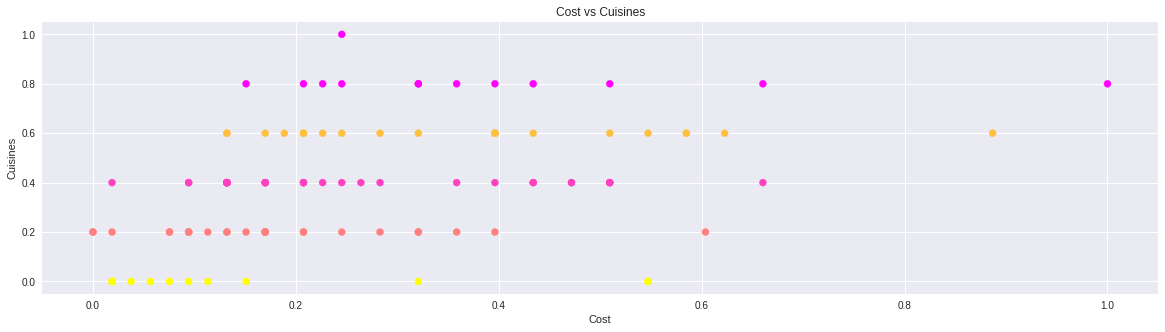

In [884]:
# visualize the clusters
plt.figure(figsize=(20, 5))  
plt.scatter(df1['Cost'], df1['Cuisines Count'], c=y_kmeans, s=50, cmap='spring', alpha=1) 
plt.title('Cost vs Cuisines')
plt.xlabel('Cost')
plt.ylabel('Cuisines')
plt.show()

In [885]:
# Silhouette score
features = ['Collections Count']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.860830784042358
For n_clusters = 3, silhouette score is 0.8930715990099743
For n_clusters = 4, silhouette score is 0.9446849446849447
For n_clusters = 5, silhouette score is 0.9665750915750916
For n_clusters = 6, silhouette score is 0.9857142857142858
For n_clusters = 7, silhouette score is 0.9809523809523809
For n_clusters = 8, silhouette score is 0.9809523809523809
For n_clusters = 9, silhouette score is 0.9809523809523809
For n_clusters = 10, silhouette score is 0.9809523809523809


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


For n_clusters = 11, silhouette score is 0.9809523809523809
For n_clusters = 12, silhouette score is 0.9809523809523809
For n_clusters = 13, silhouette score is 0.9809523809523809
For n_clusters = 14, silhouette score is 0.9809523809523809
For n_clusters = 15, silhouette score is 0.9809523809523809


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  """
/usr/local/lib/py

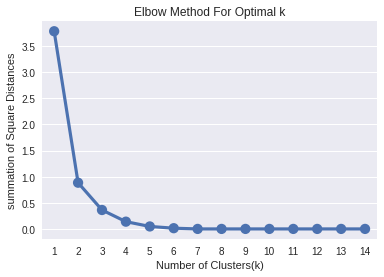

In [886]:
# elbow method for optimal k
summation_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    summation_of_sq_dist[k] = km.inertia_

# plot the graph for the summation of square distance values and number of clusters
sns.pointplot(x = list(summation_of_sq_dist.keys()), y = list(summation_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('summation of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [887]:
# cluster the restaurants
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
y_kmeans

array([2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [888]:
# cluster details
print(f'{list(y_kmeans).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_kmeans).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_kmeans).count(2)} restaurants belongs to the 3rd cluster')

18 restaurants belongs to the 1st cluster
80 restaurants belongs to the 2nd cluster
7 restaurants belongs to the 3rd cluster


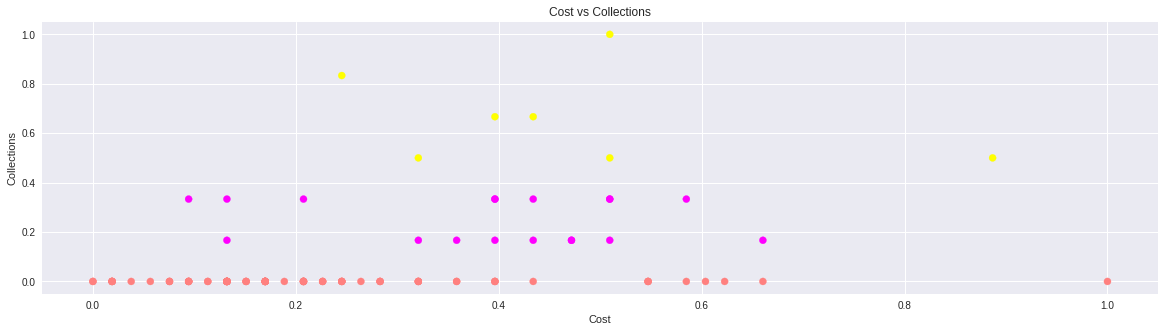

In [889]:
# visualize the clusters
plt.figure(figsize=(20, 5))  
plt.scatter(df1['Cost'], df1['Collections Count'], c=y_kmeans, s=50, cmap='spring', alpha=1) 
plt.title('Cost vs Collections')
plt.xlabel('Cost')
plt.ylabel('Collections')
plt.show()

#### <b> Cost vs. Cuisines

For n_clusters = 2 The average silhouette_score is : 0.4108872554005498
For n_clusters = 3 The average silhouette_score is : 0.4103484899317167
For n_clusters = 4 The average silhouette_score is : 0.42131336674227515
For n_clusters = 5 The average silhouette_score is : 0.42606524850768446
For n_clusters = 6 The average silhouette_score is : 0.413471874624247
For n_clusters = 7 The average silhouette_score is : 0.4237297685457263
For n_clusters = 8 The average silhouette_score is : 0.435535609852507
For n_clusters = 9 The average silhouette_score is : 0.41598817593733567
For n_clusters = 10 The average silhouette_score is : 0.44460627173779566


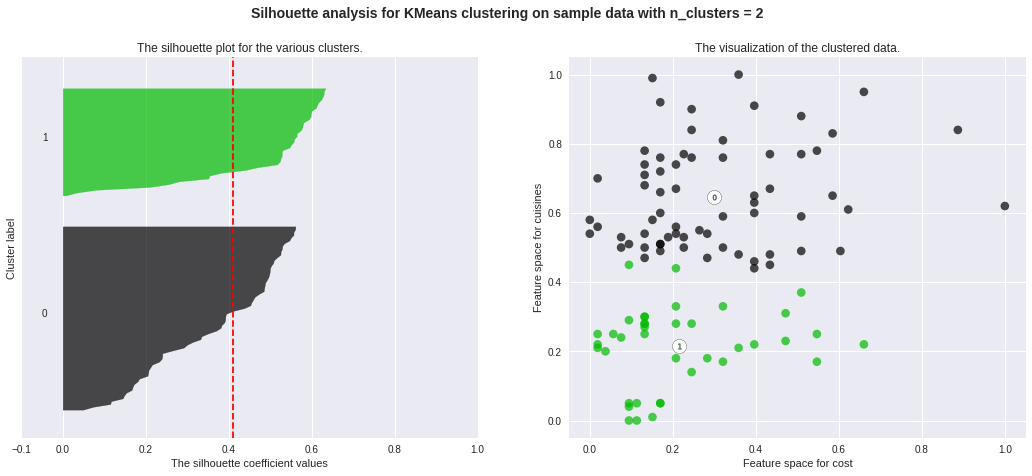

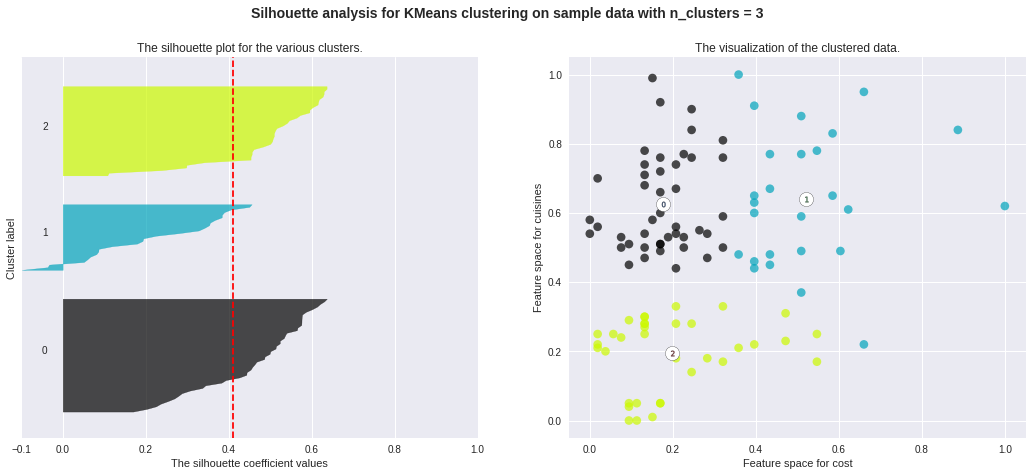

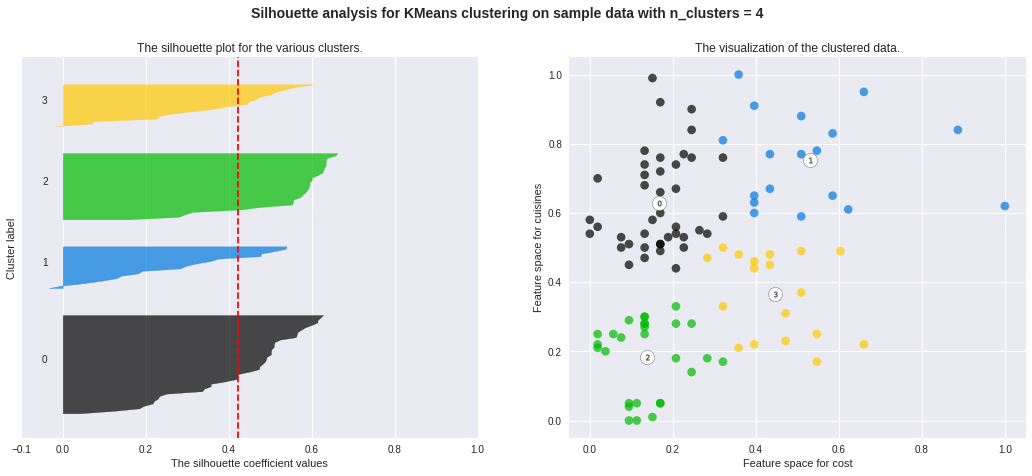

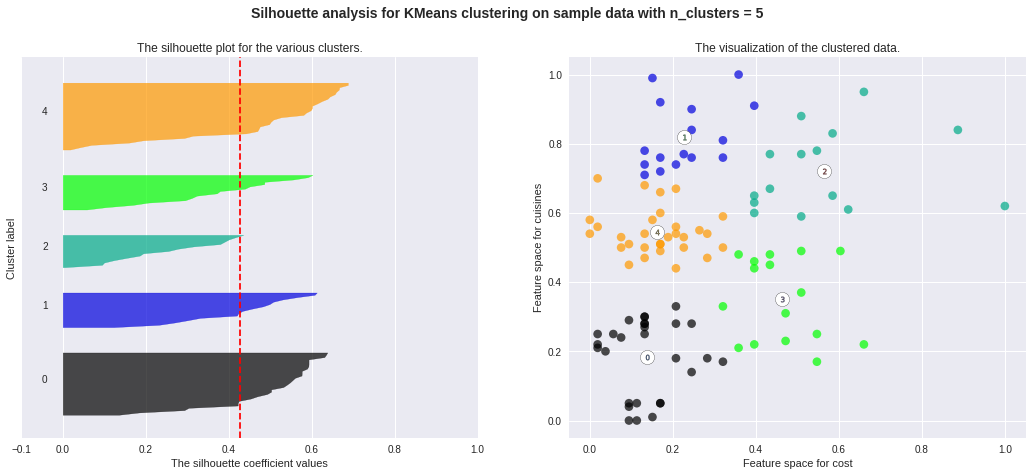

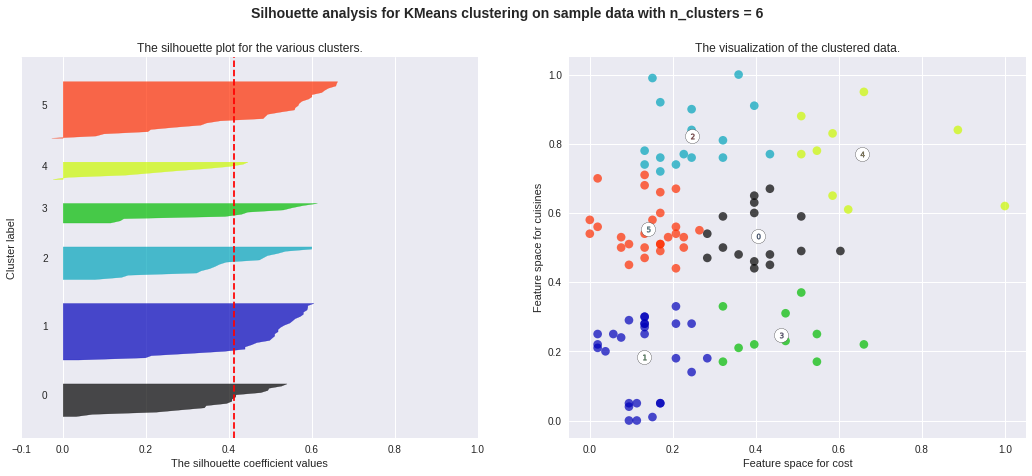

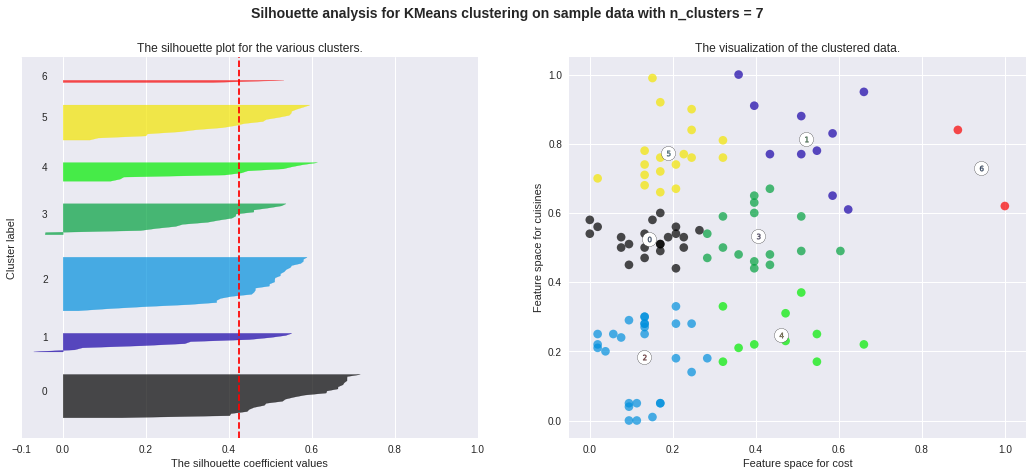

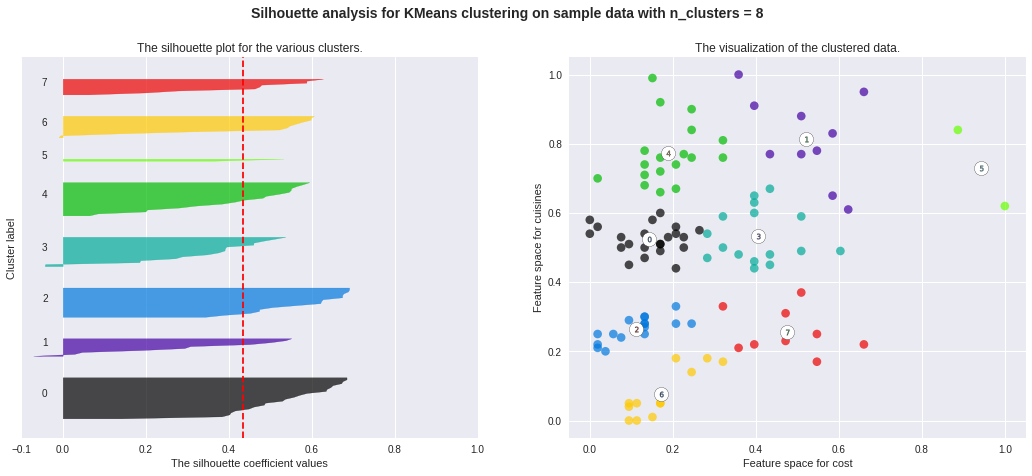

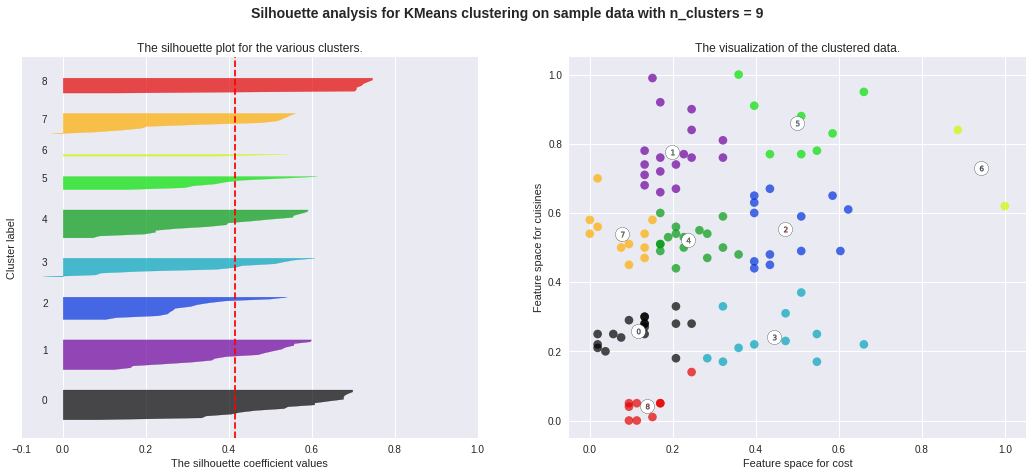

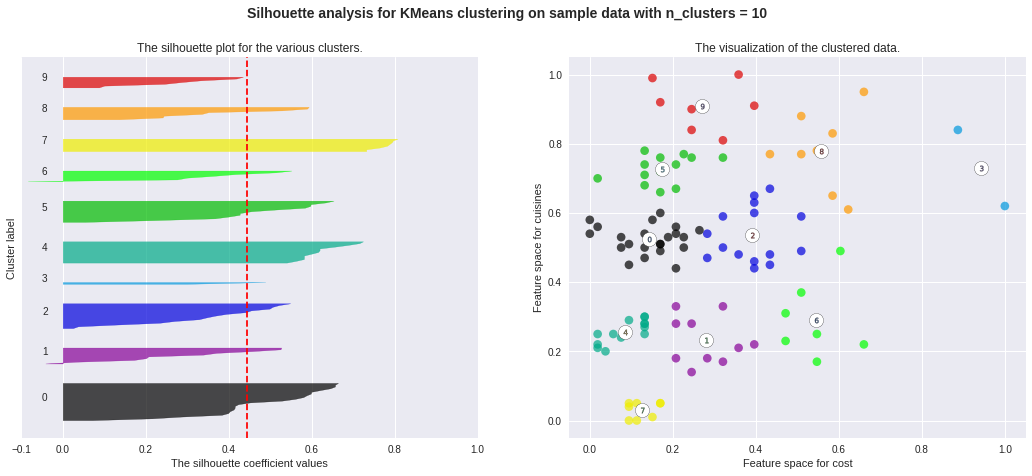

In [890]:
# features to cluster
features = ['Cost', 'cuisines similarity']
X = df1[features].values

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=30, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for cost")
    ax2.set_ylabel("Feature space for cuisines")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### <b> Cost vs. Collections

For n_clusters = 2 The average silhouette_score is : 0.6503294461319847
For n_clusters = 3 The average silhouette_score is : 0.5469700766714365
For n_clusters = 4 The average silhouette_score is : 0.5950282873707363
For n_clusters = 5 The average silhouette_score is : 0.5434863480523228


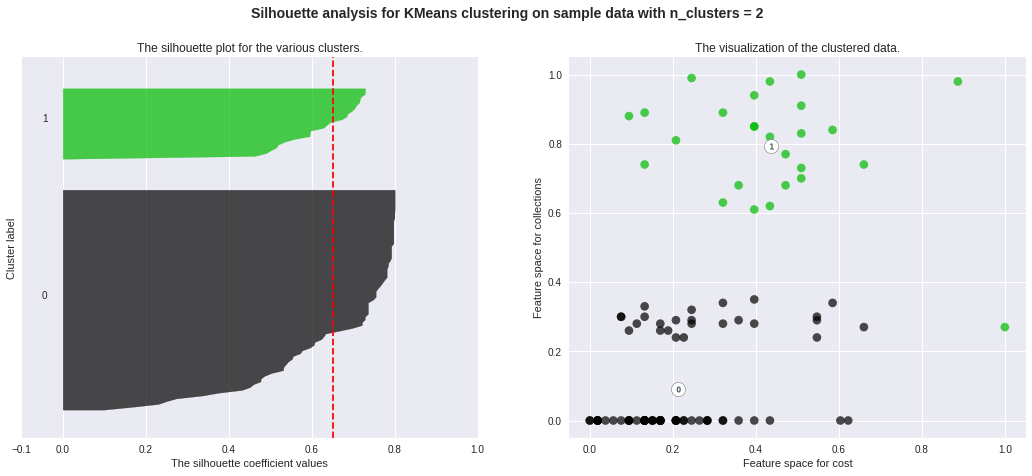

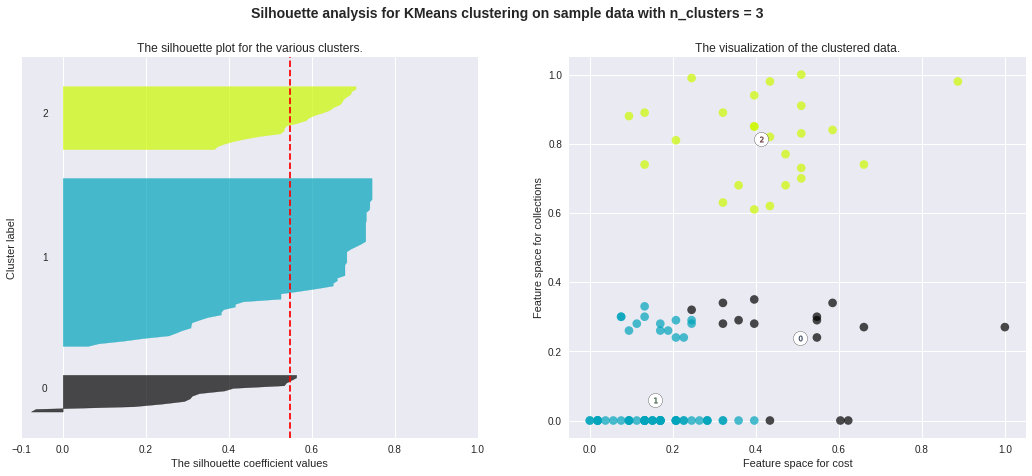

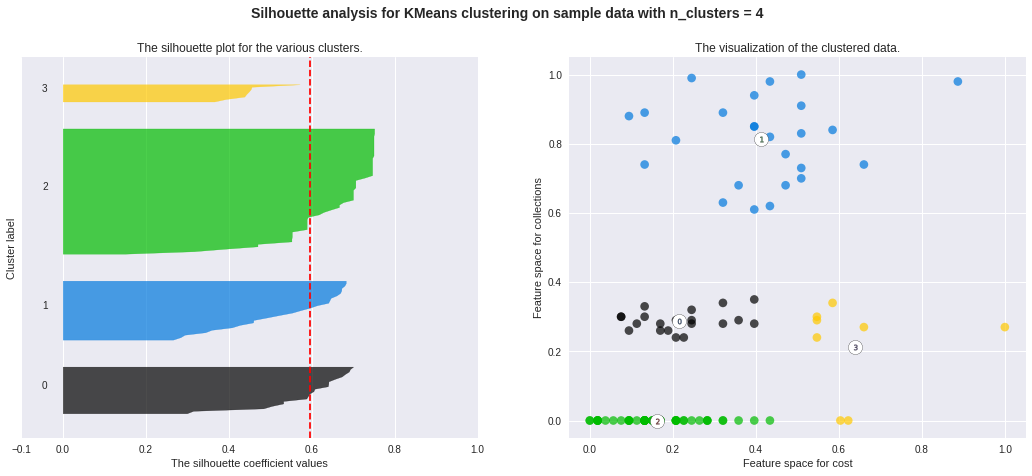

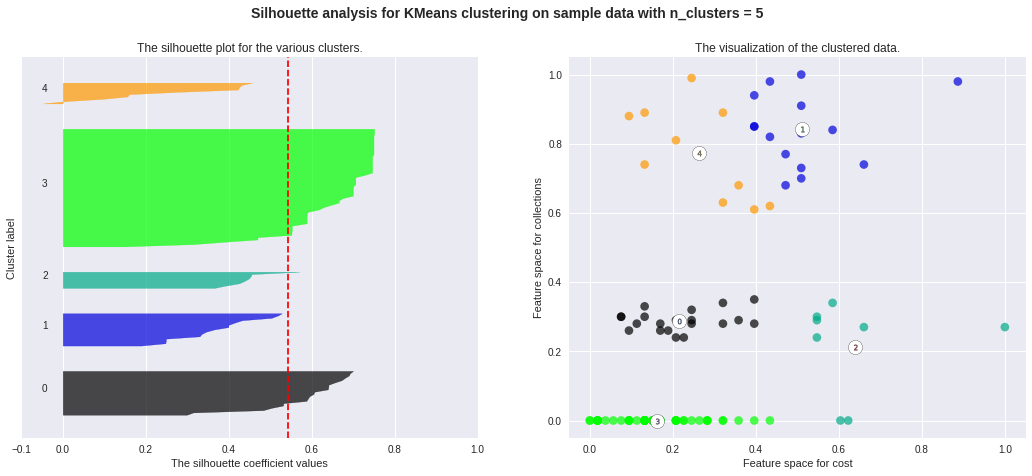

In [891]:
# features to cluster
features = ['Cost', 'collections similarity']
X = df1[features].values

for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=30, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for cost")
    ax2.set_ylabel("Feature space for collections")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### <b> Hierarchical Clustering

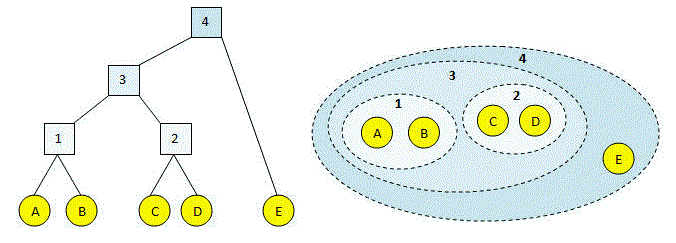

#### <b> Clustering by dining cost of the restaurants

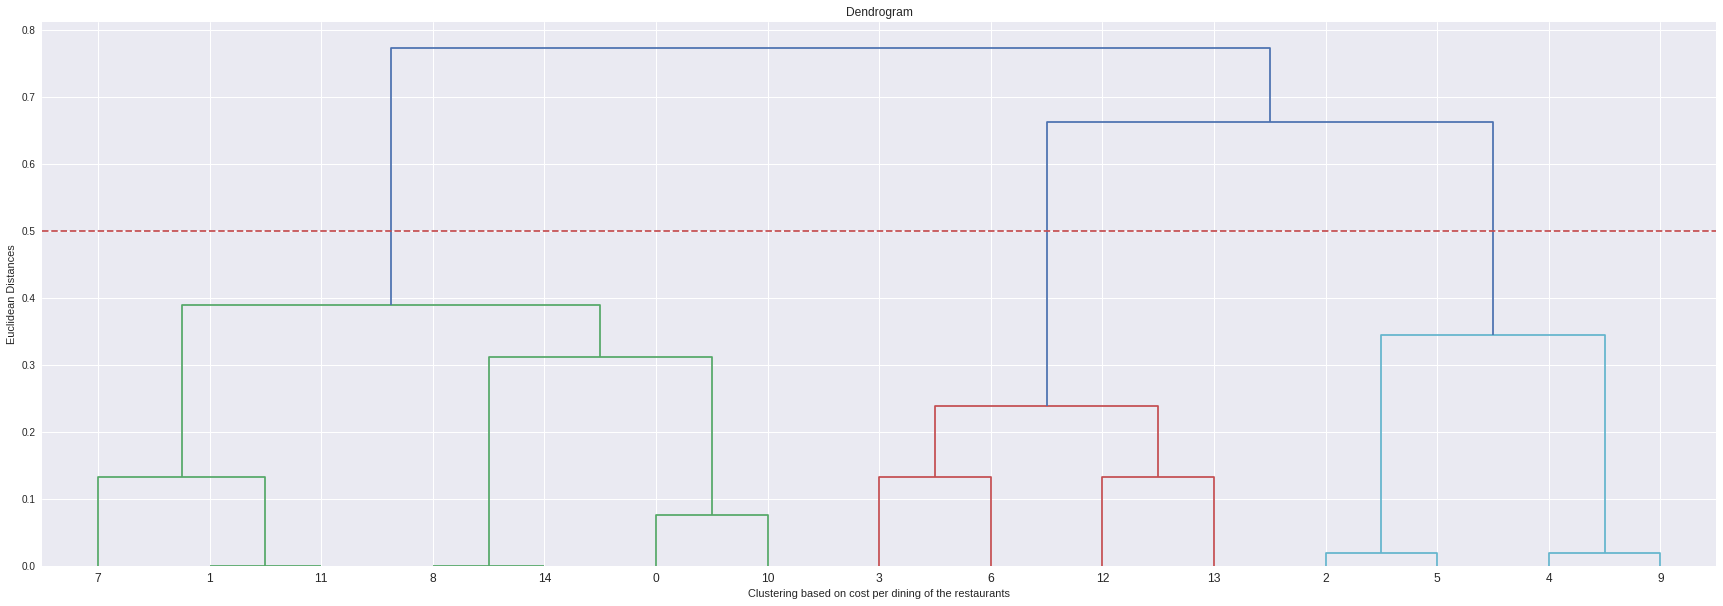

In [892]:
# Plot dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df1['Cost'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on cost per dining of the restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

In [893]:
# predict the cluster to which a restaurant falls under
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_clusters = cluster.fit_predict(df1['Cost'].values.reshape(-1,1))

In [894]:
# cluster details
print(f'{list(y_clusters).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_clusters).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_clusters).count(2)} restaurants belongs to the 3rd cluster')

16 restaurants belongs to the 1st cluster
67 restaurants belongs to the 2nd cluster
22 restaurants belongs to the 3rd cluster


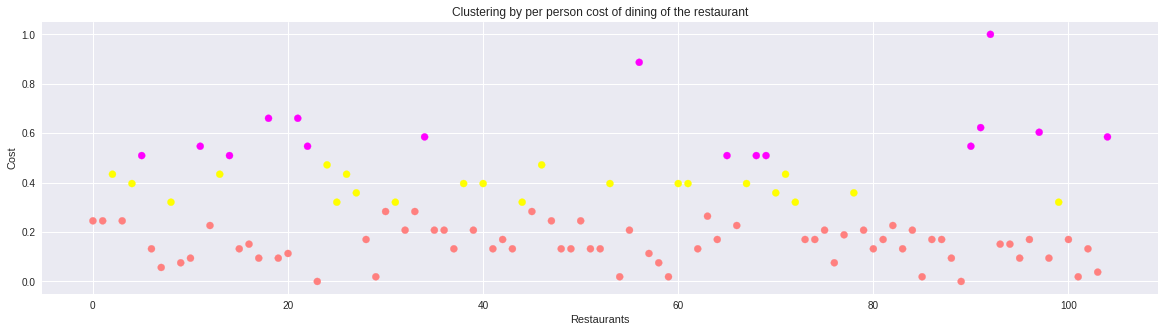

In [895]:
# visualize the clusters
plt.figure(figsize=(20, 5))  
plt.scatter(range(105), df1['Cost'], c=cluster.labels_, s=50, cmap='spring', alpha=1) 
plt.title('Clustering by per person cost of dining of the restaurant')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

#### <b> Clustering by collections of the restaurants 

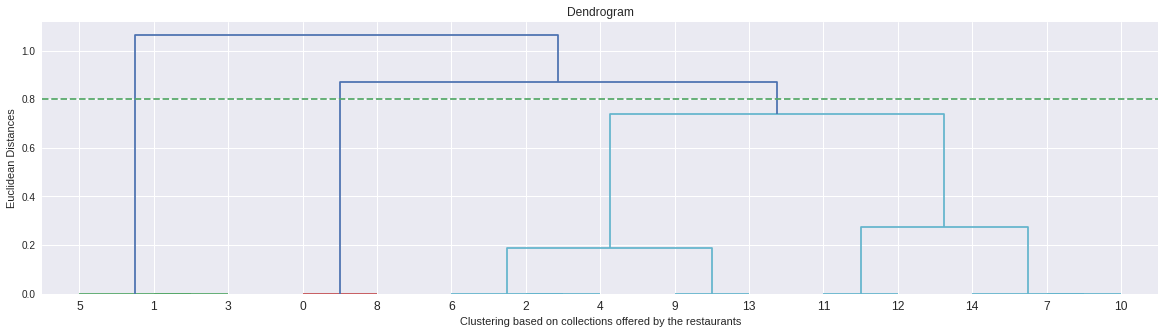

In [896]:
# Plot dendrogram
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(df1['collections similarity'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on collections offered by the restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=0.8, color='g', linestyle='--')
plt.show()

In [897]:
# predict the cluster to which a restaurant falls under
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_clusters = cluster.fit_predict(df1['collections similarity'].values.reshape(-1,1))

In [898]:
# cluster details
print(f'{list(y_clusters).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_clusters).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_clusters).count(2)} restaurants belongs to the 3rd cluster')

25 restaurants belongs to the 1st cluster
26 restaurants belongs to the 2nd cluster
54 restaurants belongs to the 3rd cluster


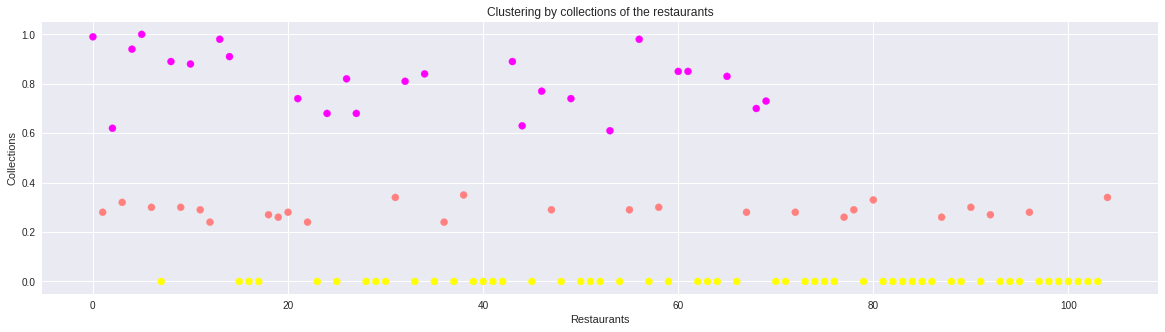

In [899]:
# visualize the clusters
plt.figure(figsize=(20, 5))  
plt.scatter(range(105), df1['collections similarity'], c=cluster.labels_, s=50, cmap='spring', alpha=1) 
plt.title('Clustering by collections of the restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Collections')
plt.show()

#### <b> Clustering by cuisines offered by the restaurants

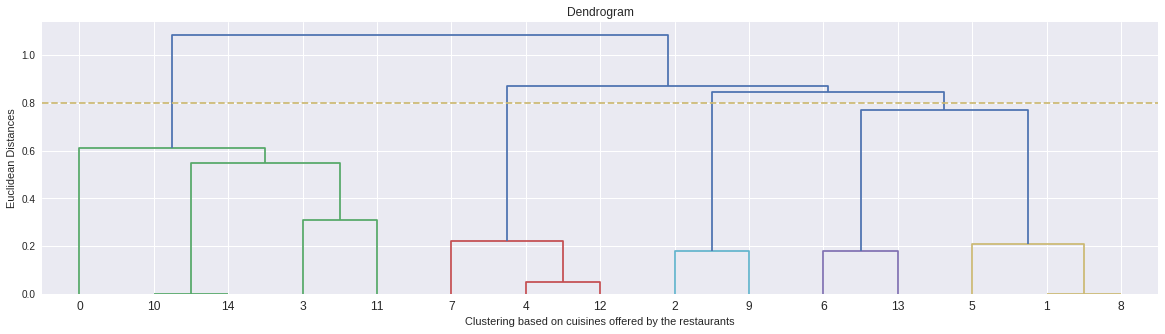

In [900]:
# Plot dendrogram
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(sch.linkage(df1['cuisines similarity'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on cuisines offered by the restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=0.8, linestyle='--', color='y')
plt.show()

In [901]:
# predict the cluster to which a restaurant falls under
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
y_clusters = cluster.fit_predict(df1['cuisines similarity'].values.reshape(-1,1))

In [902]:
# cluster details
print(f'{list(y_clusters).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_clusters).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_clusters).count(2)} restaurants belongs to the 3rd cluster')
print(f'{list(y_clusters).count(3)} restaurants belongs to the 4th cluster')

44 restaurants belongs to the 1st cluster
29 restaurants belongs to the 2nd cluster
24 restaurants belongs to the 3rd cluster
8 restaurants belongs to the 4th cluster


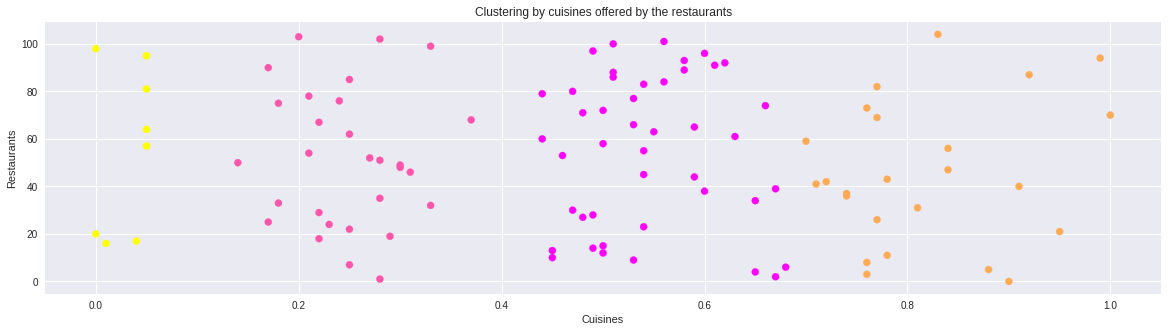

In [903]:
# visualize the clusters
plt.figure(figsize=(20, 5))  
plt.scatter(df1['cuisines similarity'], range(105), c=cluster.labels_, s=50, cmap='spring', alpha=1) 
plt.title('Clustering by cuisines offered by the restaurants')
plt.xlabel('Cuisines')
plt.ylabel('Restaurants')
plt.show()

#### <b> Clustering by operating times of the restaurants

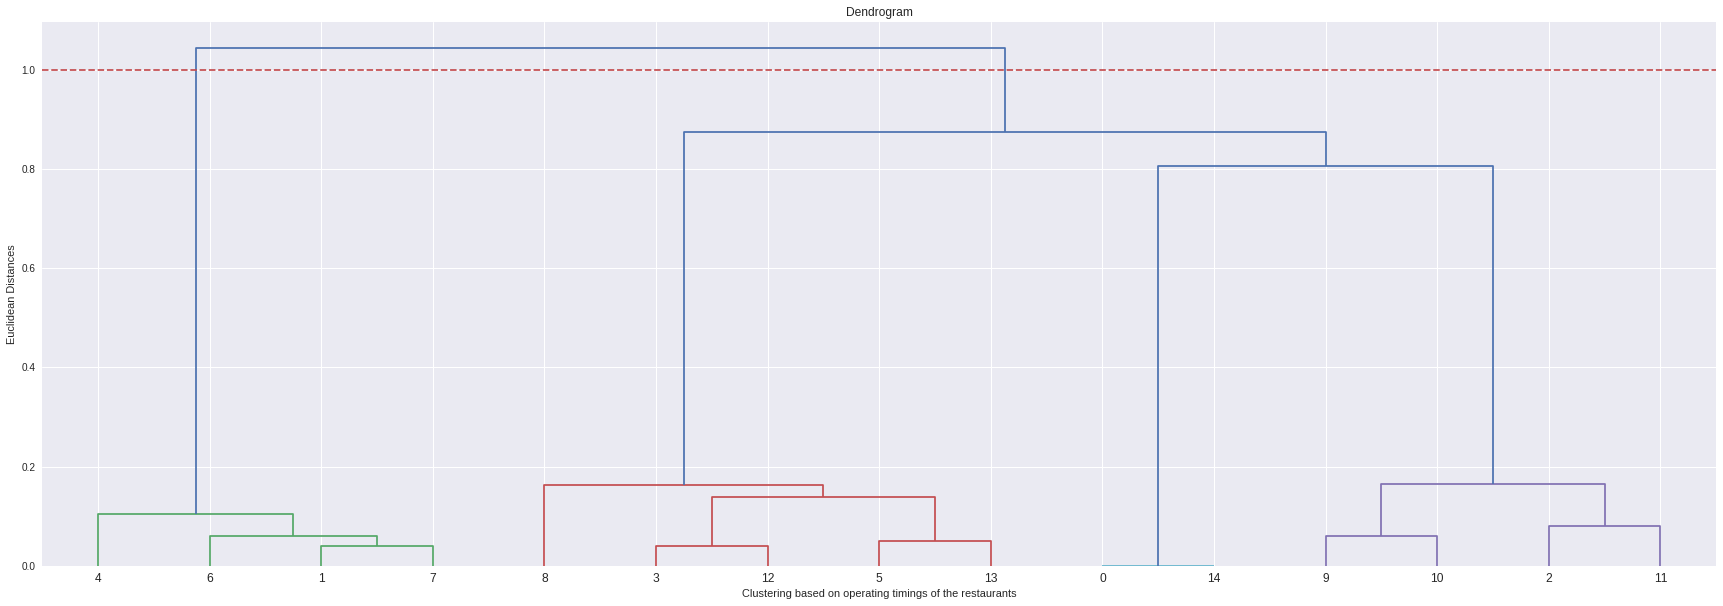

In [904]:
# Plot dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df1['timings similarity'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on operating timings of the restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.show()

In [905]:
# predict the cluster to which a restaurant falls under
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_clusters = cluster.fit_predict(df1['timings similarity'].values.reshape(-1,1))

In [906]:
# cluster details
print(f'{list(y_clusters).count(0)} restaurants belongs to the 1st cluster')
print(f'{list(y_clusters).count(1)} restaurants belongs to the 2nd cluster')
print(f'{list(y_clusters).count(2)} restaurants belongs to the 3rd cluster')

36 restaurants belongs to the 1st cluster
69 restaurants belongs to the 2nd cluster
0 restaurants belongs to the 3rd cluster


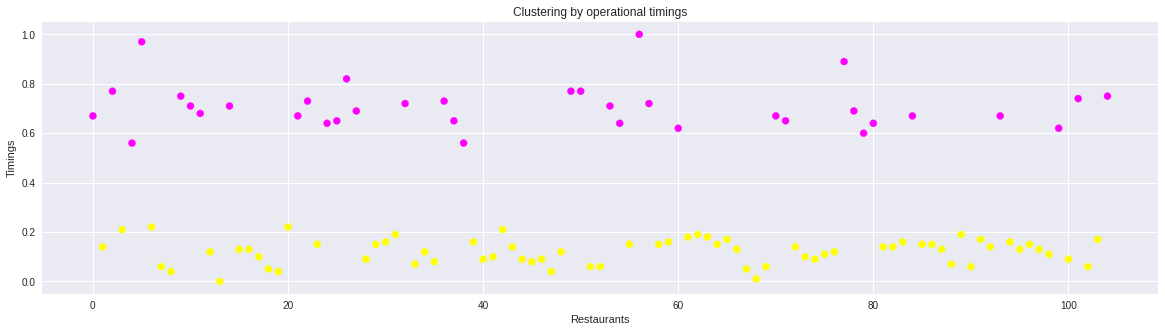

In [907]:
# visualize the clusters
plt.figure(figsize=(20, 5))  
plt.scatter(range(105), df1['timings similarity'], c=cluster.labels_, s=50, cmap='spring', alpha=1) 
plt.title("Clustering by operational timings")
plt.xlabel("Restaurants")
plt.ylabel("Timings")
plt.show()

# **Sentiment Analysis**

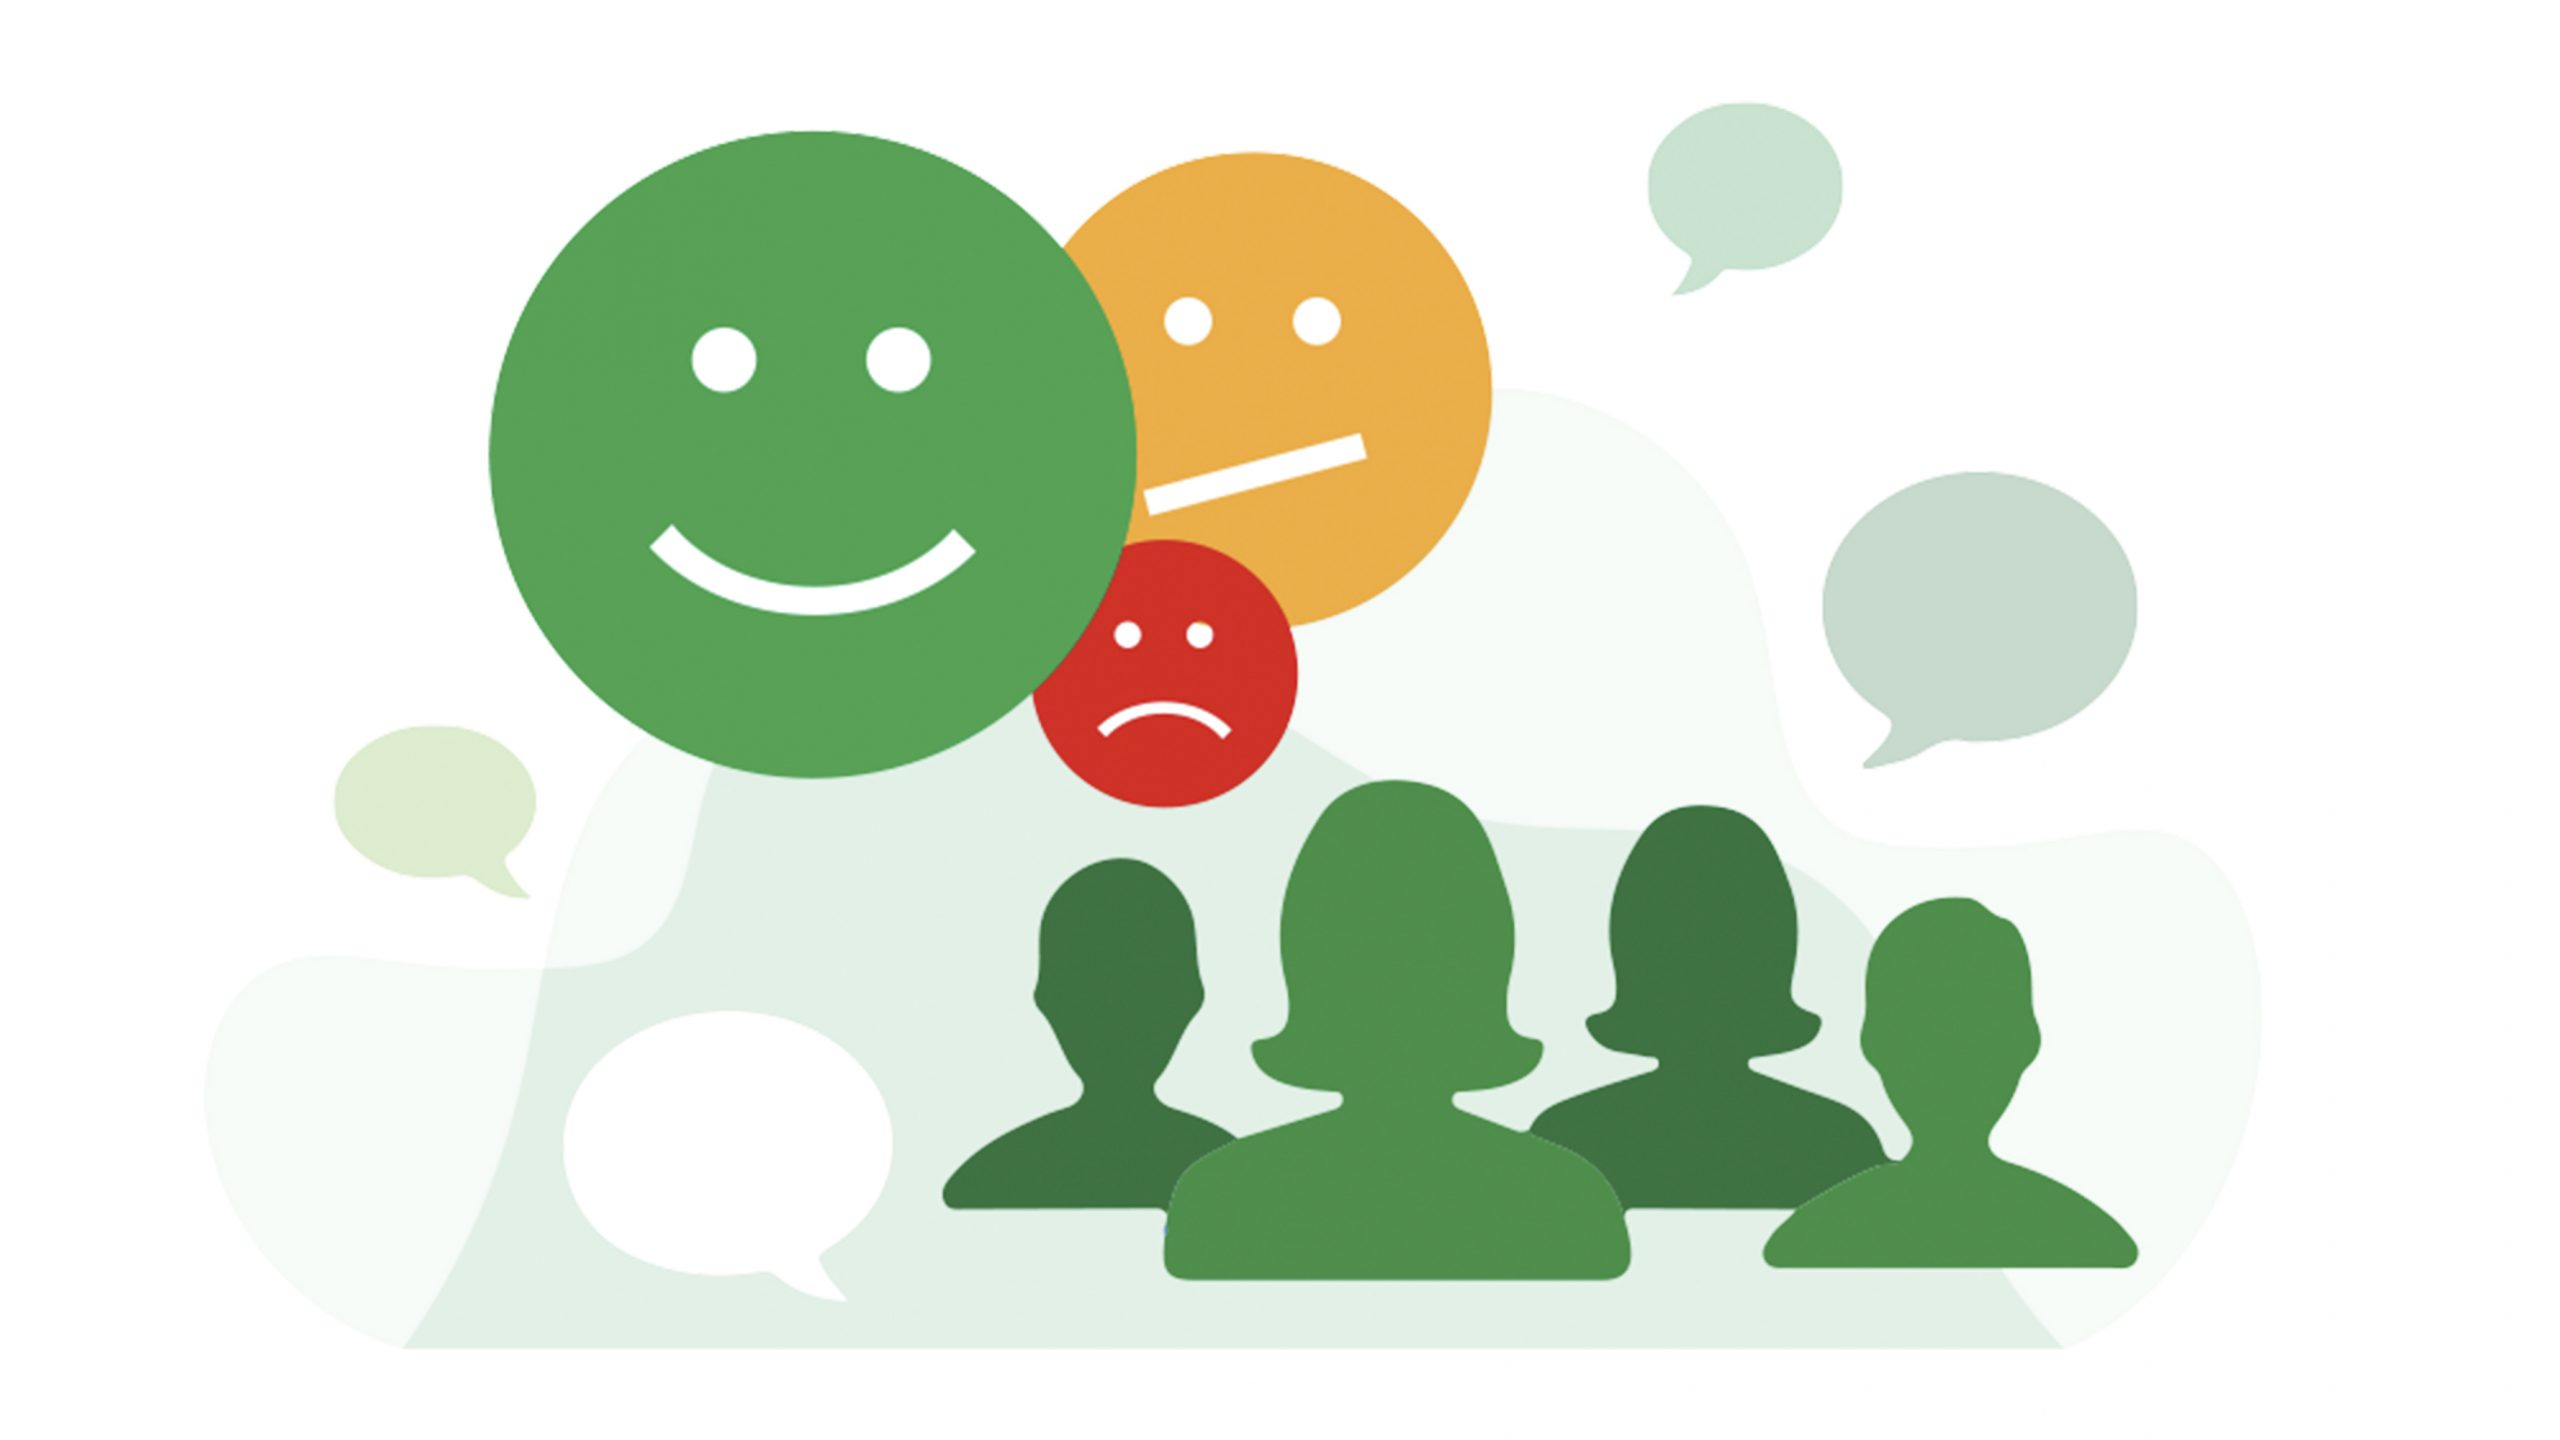

In [908]:
df2.head()

Restaurant              Reviewer  ...             Time Pictures
0  Beyond Flavours     Rusha Chakraborty  ...  5/25/2019 15:54        0
1  Beyond Flavours  Anusha Tirumalaneedi  ...  5/25/2019 14:20        0
2  Beyond Flavours       Ashok Shekhawat  ...  5/24/2019 22:54        0
3  Beyond Flavours        Swapnil Sarkar  ...  5/24/2019 22:11        0
4  Beyond Flavours                Dileep  ...  5/24/2019 21:37        0

[5 rows x 7 columns]

In [909]:
# rename column for merge
df2.rename(columns={'Restaurant':'Name'}, inplace=True)

In [910]:
# merge datasets
df = pd.merge(df1, df2, how='inner', on='Name')

In [911]:
df.head()

Name      Cost  ...             Time Pictures
0  Beyond Flavours  0.245283  ...  5/25/2019 15:54        0
1  Beyond Flavours  0.245283  ...  5/25/2019 14:20        0
2  Beyond Flavours  0.245283  ...  5/24/2019 22:54        0
3  Beyond Flavours  0.245283  ...  5/24/2019 22:11        0
4  Beyond Flavours  0.245283  ...  5/24/2019 21:37        0

[5 rows x 16 columns]

In [912]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    10000 non-null  object 
 1   Cost                    10000 non-null  float64
 2   Collections             10000 non-null  object 
 3   Cuisines                10000 non-null  object 
 4   Timings                 10000 non-null  object 
 5   cuisines similarity     10000 non-null  float64
 6   collections similarity  10000 non-null  float64
 7   timings similarity      10000 non-null  float64
 8   Cuisines Count          10000 non-null  float64
 9   Collections Count       10000 non-null  float64
 10  Reviewer                9962 non-null   object 
 11  Review                  9955 non-null   object 
 12  Rating                  9962 non-null   object 
 13  Metadata                9962 non-null   object 
 14  Time                    9962 non-null  

In [913]:
# drop null values
df.dropna(axis=0, inplace=True)
df = df.drop(df[df['Rating']=='Like'].index, axis = 0)
df.reset_index(inplace=True)
df = df.drop('index', axis=1)

In [914]:
# extract review and followers from metadata
df['Metadata'] = df['Metadata'].apply(lambda x: x.split(' '))
df['Reviews'] = df['Metadata'].apply(lambda x: x[0])
df['followers'] = df['Metadata'].apply(lambda x: x[-2])

# cast to appropriate datatype
df['Reviews'] = df['Reviews'].astype(int)
df['followers'] = df['followers'].astype(int)

In [915]:
# indexes with high reviews and followers
r = df.iloc[list(df['Reviews'][df['Reviews'].isin(sorted(df['Reviews'], reverse=True)[:120])].index),10].unique()
f = df.iloc[list(df['followers'][df['followers'].isin(sorted(df['followers'],reverse=True)[:120])].index),10].unique()

# list of critics
critics = []
for i in r:
  if i in list(f):
    critics.append(i)
critics

['Asad Rana',
 'Ramesh Menon',
 'Paramita Sarkar',
 'Epicurean Tales',
 'Mithun Ravindranathan',
 'Kamaal Ahmed (zaiqebaaz)',
 'Supriya Subudhi',
 'Sumit',
 'Abhilash Pradhan (AbTheFoodie)',
 'Yash Kumar Singh',
 'Anjan Goswami',
 'Aarti Kamath',
 'Sabyasachi Raychaudhuri',
 'Nitin Shiralkar']

In [916]:
# remove punctuations from reviews
translator = str.maketrans('', '', string.punctuation)
df['review'] = copy.deepcopy(df['Review'])
df['review'] = df['review'].apply(lambda x: x.translate(translator))

In [917]:
# remove stopwords from reviews
sw = stopwords.words('english')
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)
df['review'] = df['review'].apply(stopwords)

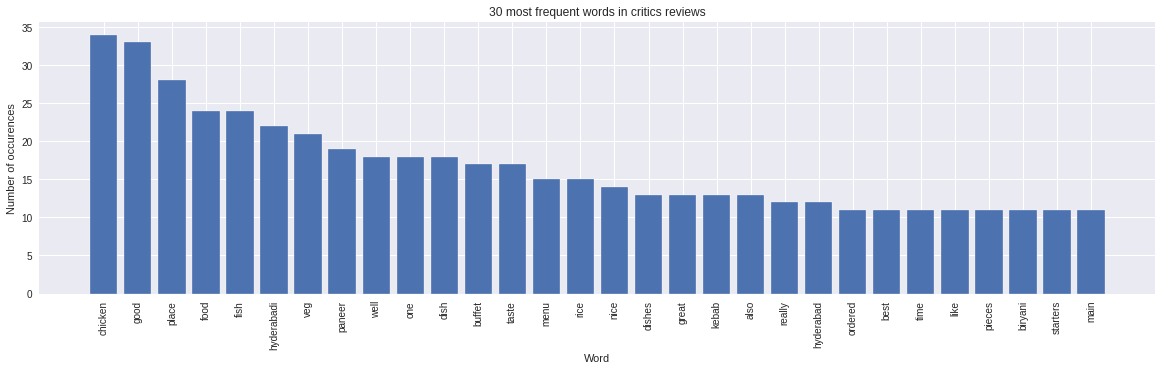

In [918]:
# vectorize the critics reviews
count_vectorizer = CountVectorizer()
vectorized_reviews = count_vectorizer.fit_transform(df[df['Reviewer'].isin(critics)]['review'].values)
vectorized_total = np.sum(vectorized_reviews, axis=0)
word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
word_values = np.flip(np.sort(vectorized_total)[0,:],1)

# words vectorized
word_vectors = np.zeros((30, vectorized_reviews.shape[1]))
for i in range(30):
  word_vectors[i,word_indices[0,i]] = 1

# frequent words with frequency of occurance
words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]
word_values = word_values[0,:30].tolist()[0]

# plotting 30 most frequent words
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('30 most frequent words in critics reviews')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

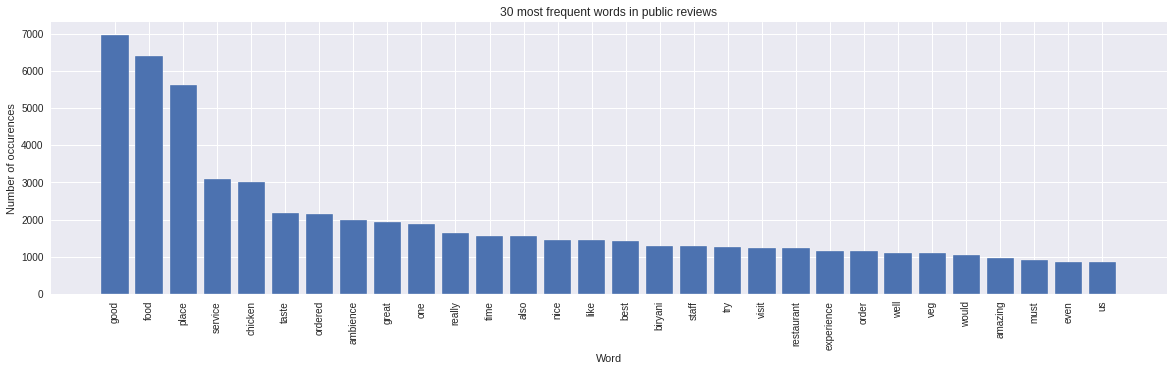

In [919]:
# vectorize the public reviews
count_vectorizer = CountVectorizer()
vectorized_reviews = count_vectorizer.fit_transform(df[~df['Reviewer'].isin(critics)]['review'].values)
vectorized_total = np.sum(vectorized_reviews, axis=0)
word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
word_values = np.flip(np.sort(vectorized_total)[0,:],1)

# words vectorized
word_vectors = np.zeros((30, vectorized_reviews.shape[1]))
for i in range(30):
  word_vectors[i,word_indices[0,i]] = 1

# frequent words with frequency of occurance
words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]
word_values = word_values[0,:30].tolist()[0]

# plotting 30 most frequent words
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('30 most frequent words in public reviews')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [920]:
# function to give the sentiment of a review
def sentiment(x):
  if x < 3:
    return -1
  elif x >= 3 and x < 4:
    return 0
  else:
    return 1

In [921]:
#Adding the sentiments column
df['Rating'] = df['Rating'].astype(float)
df['sentiment'] = df.Rating.apply(lambda x: sentiment(x))

In [922]:
# split the dataset
df_public = df[~df['Reviewer'].isin(critics)]
df_critics = df[df['Reviewer'].isin(critics)]

# impute feature values
l1 = ['positive', 'negative', 'neutral']
l2 = list(df_public['sentiment'].value_counts())
l3 = []
for i in l2:
  l3.append(((i/np.sum(l2))*100).round(2))
l4 = list(df_critics['sentiment'].value_counts())
l5 = []
for j in l4:
  l5.append(((j/np.sum(l4))*100).round(2))

# create a dataframe
critic_public  = pd.DataFrame(data={'by':['public', 'critics'], 'positive':[l3[0], l5[0]], 'negative':[l3[1], l5[1]], 'neutral':[l3[2], l5[2]]})

In [923]:
# sentiment of reviews - public vs. critics
critic_public.set_index('by')

positive  negative  neutral
by                                  
public      62.95     24.60    12.45
critics     69.57     17.39    13.04

In [924]:
# select independent variable and D.V
X = df['Review']
y = df['sentiment']

# split dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=0)

In [925]:
# vectorize the reviews
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# implementing logistic regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
y_pred_lr = lr.predict(X_test_vec)
print("Results for Logistic Regression with tfidf")
print(lr_score)

Results for Logistic Regression with tfidf
0.8316254771950975


In [926]:
# function to give the sentiment of a review
def sentiment(x):
  if x == 1:
    return 'positive'
  elif x == -1:
    return 'negative'
  else:
    return 'neutral'

In [927]:
# dataframe with reviews and its sentiment
sentiment_df = pd.DataFrame(data={'review':X_test, 'predictions':y_pred_lr, 'actuals':y_test})
sentiment_df['predicted sentiment'] = sentiment_df['predictions'].apply(lambda x: sentiment(x))
sentiment_df['actual sentiment'] = sentiment_df['actuals'].apply(lambda x: sentiment(x))

In [928]:
# view and compare predictions
sentiment_df_sample = sentiment_df[:100]
sentiment_df_sample
data_table.DataTable(sentiment_df_sample, include_index=False, num_rows_per_page=25)

In [929]:
# dataframe with sentiments data 
l1 = ['positive', 'negative', 'neutral']
l2 = list(sentiment_df['predicted sentiment'].value_counts())
l3 = list(sentiment_df['actual sentiment'].value_counts())
l4 = ['predicted']*3 + ['actual']*3
df_bar = pd.DataFrame(data={'type':l4, 'sentiment':l1+l1, 'predictions':l2+l3})
df_bar

type sentiment  predictions
0  predicted  positive         3548
1  predicted  negative         1243
2  predicted   neutral          186
3     actual  positive         3112
4     actual  negative         1232
5     actual   neutral          633

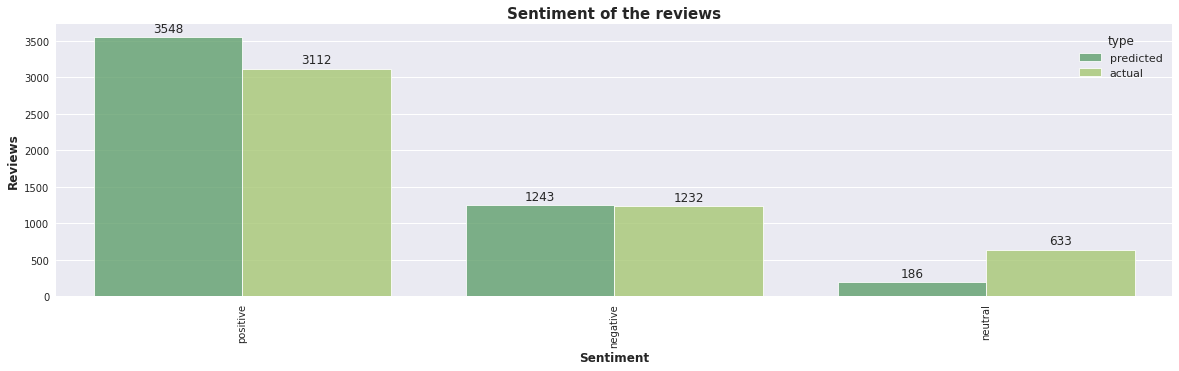

In [930]:
# visualize the sentiments in reviews
f, ax = plt.subplots(1,1, figsize=(20,5))
sns.set_theme(style="white")
splot = sns.barplot(x=df_bar['sentiment'], y=df_bar['predictions'], hue=df_bar['type'], alpha=0.8, palette='summer')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Sentiment of the reviews',weight='bold', size=15)
plt.ylabel('Reviews', size=12, weight='bold')
plt.xlabel('Sentiment', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()


In [931]:
# evaluate the predictions
print(f'confusion matrix \n{confusion_matrix(y_test, y_pred_lr)}\n')
print(f'classification report \n{classification_report(y_test, y_pred_lr)}')

confusion matrix 
[[1040   51  141]
 [ 137   94  402]
 [  66   41 3005]]

classification report 
              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      1232
           0       0.51      0.15      0.23       633
           1       0.85      0.97      0.90      3112

    accuracy                           0.83      4977
   macro avg       0.73      0.65      0.66      4977
weighted avg       0.80      0.83      0.80      4977



### <b> Conclusion

*   We started with dataset inspection and found presence of nan values which was replaced with a string, unusable columns were dropped and strings were formatted to be similar.
*   Exploratory data analysis was carried out on the dataset and various insights from the features cost, collections and cuisines were obtained.
*   Numerical features that represent the categorical features were engineered to compute distance which was used as the similarity metric to cluster the restaurants.
*   Clustering on restaurants was performed using K-means clustering and Hierarchical clustering (Agglomerative). The clusters were also used to get useful information like cost-benefit analysis.
*   Sentiment Analysis was done on the reviews of the restaurants using multinomial logistic regression. Critics were identified. Appropriate visualizations were used to derive insights.



